# <span style="font-family:serif; font-size:28px;"> Introduction</span>
<a id = "introduction" ></a>

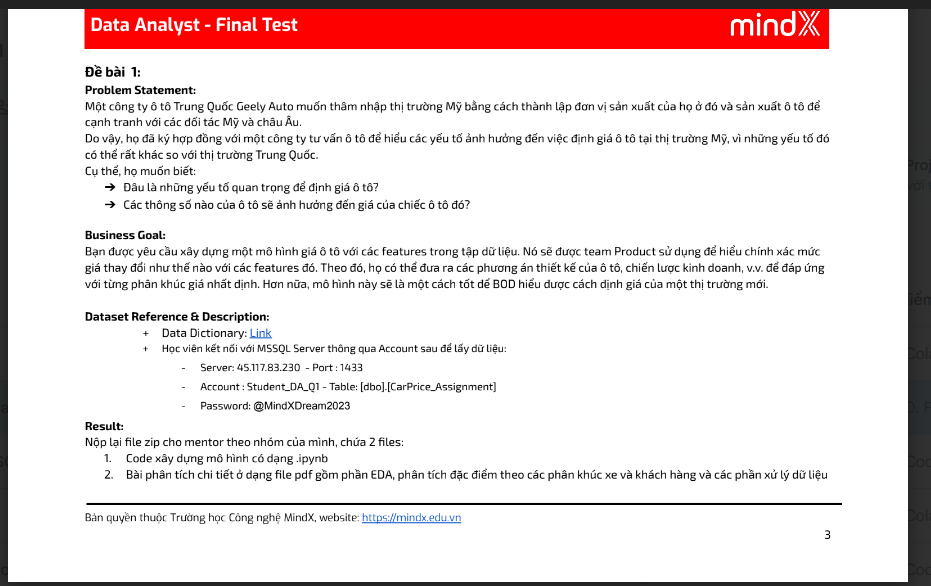

___

<a id = "5" ></a>
# <span style="font-family:serif; font-size:28px;">Loading libraries and data</span>
<a id="loading"></a>

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [ ]:
!pip install pymssql
!pip install pyodbc

In [ ]:
#import thu vien
import pandas as pd
import pymssql

In [ ]:
# Connection information
server = '45.117.83.230'
port = 1433
username = 'Student_DA_Q1'
password = '@MindXDream2023'
database = 'DA_FINAL_TEST'

# # Connect to the database
# connection = pymssql.connect(server=server, port=port, user=username, password=password, database=database)

# try:
#     # Query to select data
#     query = "SELECT * FROM dbo.sellers"

#     # Execute the query and read the results into a Pandas DataFrame
#     df = pd.read_sql(query, connection)

# finally:
#     # Ensure to close the connection after finishing the work
#     connection.close()

In [ ]:
connection = pymssql.connect(server=server, port=port, user=username, password=password, database=database)
query = "SELECT * FROM [dbo].[Customer_Churn_Banker]"

df = pd.read_sql(query, connection)
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


___

<a id = "6" ></a>
# <span style="font-family:serif; font-size:28px;"> Undertanding the data</span>
<a id = "Undertanding the data" ></a>

In [ ]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Phân nhóm và mô tả chi tiết các biến trong tập dữ liệu**

Trong bài toán phân tích khả năng rời bỏ của khách hàng tại ngân hàng ABC, việc phân loại và hiểu rõ đặc điểm từng biến là bước đầu tiên quan trọng nhằm định hướng quá trình khám phá dữ liệu (EDA) và xây dựng mô hình dự đoán phù hợp. Dưới đây là cách phân nhóm và mô tả chi tiết các biến:

**1. Biến định danh (Identifier)**

- customer_id: Mã định danh duy nhất của từng khách hàng trong hệ thống ngân hàng. Biến này không mang ý nghĩa phân tích và sẽ được loại bỏ trong quá trình xử lý dữ liệu.

**2. Nhóm thông tin nhân khẩu học (Demographic Features)**

Các biến thuộc nhóm này giúp mô tả đặc điểm cơ bản của khách hàng, từ đó có thể khám phá các xu hướng hành vi rời bỏ theo giới tính, độ tuổi hoặc khu vực cư trú.

- gender: Giới tính của khách hàng, bao gồm hai giá trị là Nam (Male) và Nữ (Female).

- age: Tuổi của khách hàng (đơn vị: năm).

- country: Quốc gia nơi khách hàng đang sinh sống, phản ánh yếu tố địa lý trong hành vi sử dụng dịch vụ.

**3. Nhóm thông tin tài chính (Financial Features)**

Nhóm biến này phản ánh tình hình tài chính và mức độ ổn định về thu nhập hoặc tài sản của khách hàng – một trong những yếu tố then chốt có thể tác động đến quyết định rời bỏ.

- credit_score: Điểm tín dụng của khách hàng, là chỉ số thể hiện mức độ uy tín trong tài chính và khả năng hoàn trả nợ.

- balance: Số dư tài khoản hiện tại của khách hàng tại ngân hàng (đơn vị: tiền tệ).

- estimated_salary: Thu nhập ước tính hàng năm của khách hàng, do hệ thống ngân hàng nội suy hoặc khai báo.

**4. Nhóm hành vi sử dụng dịch vụ (Behavioral Features)**

Đây là nhóm biến phản ánh cách khách hàng tương tác với ngân hàng trong quá khứ – rất quan trọng trong việc dự đoán khả năng churn.

- tenure: Số năm khách hàng đã duy trì tài khoản tại ngân hàng ABC.

- products_number: Số lượng sản phẩm mà khách hàng đang sử dụng từ ngân hàng, ví dụ như tài khoản tiết kiệm, vay tín chấp, đầu tư, thẻ ghi nợ,...

- credit_card: Biến nhị phân (0 hoặc 1), cho biết khách hàng có đang sở hữu thẻ tín dụng tại ngân hàng hay không.

- active_member: Biến nhị phân (0 hoặc 1), cho biết khách hàng có đang hoạt động tích cực với ngân hàng (giao dịch, sử dụng dịch vụ) hay không.

**5. Biến mục tiêu (Target Variable)**

Biến mục tiêu là biến cần dự đoán trong bài toán học máy – phản ánh hành vi rời bỏ dịch vụ của khách hàng.

- churn: Biến nhị phân (0 = Không rời bỏ, 1 = Rời bỏ). Đây là đầu ra của mô hình, được sử dụng để huấn luyện và đánh giá hiệu quả dự đoán.

In [ ]:
df.shape

(10000, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  object 
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [ ]:
df.columns.values

array(['customer_id', 'credit_score', 'country', 'gender', 'age',
       'tenure', 'balance', 'products_number', 'credit_card',
       'active_member', 'estimated_salary', 'churn'], dtype=object)

In [ ]:
df.dtypes

,0
customer_id,int64
credit_score,int64
country,object
gender,object
age,int64
tenure,int64
balance,float64
products_number,int64
credit_card,object
active_member,int64


In [ ]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,199992.480000,1.000000


**1. Tổng quan dữ liệu**

- Dữ liệu phân tích gồm 10.000 quan sát và 11 biến, không xuất hiện giá trị thiếu (missing value). Biến mục tiêu là churn – đại diện cho hành vi rời bỏ ngân hàng của khách hàng (1: churn, 0: không churn). Theo thống kê mô tả, tỷ lệ churn hiện tại là 20.37%, phản ánh mức độ rủi ro mất khách hàng tương đối cao. Đây là một vấn đề quan trọng cần được dự đoán và can thiệp kịp thời nhằm nâng cao khả năng giữ chân khách hàng.

**2. Phân tích chi tiết các đặc trưng**

- Biến credit_score có giá trị trung bình là 650.53 với độ lệch chuẩn nhỏ (~98.65), phản ánh mức tín nhiệm tài chính phổ biến ở mức trung bình – khá. Tuy nhiên, phạm vi điểm trải dài từ 350 đến 850 cho thấy sự đa dạng lớn trong hồ sơ khách hàng. Biến age (tuổi) dao động từ 18 đến 92 tuổi, trung bình 38.9 tuổi, cho thấy dữ liệu bao phủ đủ các nhóm độ tuổi trưởng thành. Cần kiểm tra sâu hơn xem độ tuổi có tương quan đến khả năng churn không – đặc biệt với các nhóm cao tuổi hoặc rất trẻ.

- Tenure, đại diện cho số năm gắn bó với ngân hàng, có giá trị từ 0 đến 10, trung bình khoảng 5 năm. Đây là một biến quan trọng cần phân tích kỹ để đánh giá liệu khách hàng trung thành lâu năm có churn ít hơn không. Đáng chú ý, biến balance có mức độ phân tán cao (mean ~76,845 nhưng std >62,000), và tồn tại nhiều khách hàng có số dư bằng 0. Điều này cho thấy một nhóm khách hàng gần như không sử dụng tài khoản – khả năng cao là churn.

- Biến products_number cho biết số sản phẩm ngân hàng mà khách hàng đang sử dụng, trung bình là 1.53 và tối đa là 4. Đây là biến có thể phản ánh mức độ gắn bó, vì thông thường khách hàng sử dụng càng nhiều sản phẩm sẽ có churn rate thấp hơn. Biến active_member là nhị phân (0 hoặc 1), với tỷ lệ khách hàng hoạt động chiếm 51.5%. Tỷ lệ khá cân bằng này gợi ý rằng mức độ tương tác có thể là một yếu tố then chốt trong việc phân biệt nhóm churn.

- Biến estimated_salary – lương ước tính – trung bình khoảng 100,000, với phạm vi rất rộng (từ 11,880 đến gần 200,000). Tuy nhiên, đây có thể là biến ít quan trọng hơn do không phản ánh trực tiếp hành vi sử dụng dịch vụ ngân hàng. Cuối cùng, biến customer_id chỉ mang tính chất định danh và sẽ được loại bỏ khỏi quá trình phân tích.

**3. Kết luận sơ bộ**

- Qua phân tích mô tả ban đầu, có thể thấy rằng dữ liệu khá đầy đủ, không thiếu giá trị, và các biến đều mang thông tin có thể hữu ích cho việc dự đoán churn. Tuy nhiên, sự mất cân bằng nhãn ở biến mục tiêu (churn ~20%) cần được lưu ý và xử lý trong giai đoạn huấn luyện mô hình. Một số đặc trưng như age, balance, tenure, products_number và active_member được kỳ vọng sẽ đóng vai trò chính trong việc xác định nguy cơ churn. Giai đoạn tiếp theo sẽ tập trung vào phân tích trực quan (EDA) để kiểm tra sâu hơn các mối quan hệ này và xây dựng baseline model phù hợp.

<a id = "8" ></a>
# <span style="font-family:serif; font-size:28px;">Data Manipulation </span>
<a id = "8" ></a>

In [ ]:
df = df.drop(['customer_id'], axis = 1)
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.isnull().sum()

,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0
estimated_salary,0


In [ ]:
df['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
df["country"]= df["country"].map({"France" :0,  "Spain":1,"Germany":2})
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,Female,42,2,0.00,1,1,1,101348.88,1
1,608,1,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,0,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,0,Female,39,1,0.00,2,0,0,93826.63,0
4,850,1,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df["gender"]= df["gender"].map({"Female" :0,  "Male":1})
df.rename(columns={'gender': 'male'}, inplace=True)
df.head()

,credit_score,country,male,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df['credit_card'] = df['credit_card'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  int64  
 2   male              10000 non-null  int64  
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


<a id = "9" ></a>
# <span style="font-family:serif; font-size:28px;"> EDA - Data Visualization </span>
<a id = "datavisualization" ></a>

<a id = "1111" ></a>
#### **Churn Rate**
<a id = "Split" ></a>

In [ ]:
# Đếm số lượng mẫu theo churn (0 và 1)
churn_counts = df['churn'].value_counts()

print(churn_counts)


churn
0    7963
1    2037
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đếm số lượng churn
churn_counts = df['churn'].value_counts()
churn_percent = df['churn'].value_counts(normalize=True) * 100

# Tạo DataFrame hiển thị
churn_summary = pd.DataFrame({
    'Số lượng': churn_counts,
    'Tỷ trọng (%)': churn_percent.round(2)
})
print(churn_summary)


       Số lượng  Tỷ trọng (%)
churn                        
0          7963         79.63
1          2037         20.37


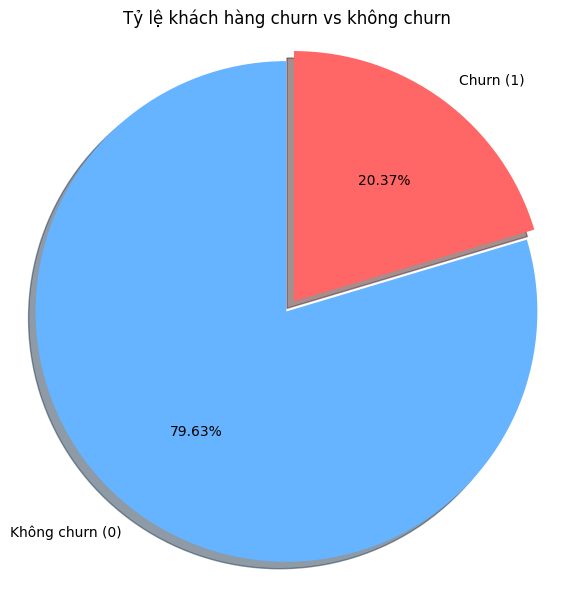

In [ ]:
# Labels tương ứng
labels = ['Không churn (0)', 'Churn (1)']

# Vẽ biểu đồ tròn
plt.figure(figsize=(6,6))
plt.pie(churn_counts,
        labels=labels,
        autopct='%1.2f%%',
        startangle=90,
        colors=['#66b3ff', '#ff6666'],
        explode=(0, 0.05),
        shadow=True)

plt.title('Tỷ lệ khách hàng churn vs không churn')
plt.axis('equal')  # Tròn đều
plt.tight_layout()
plt.show()


Biểu đồ tròn cho thấy phần lớn khách hàng (gần 80%) không rời bỏ dịch vụ, trong khi khoảng 20% có churn. Tuy tỷ lệ churn không chiếm đa số, nhưng con số 20% vẫn là đáng kể đối với ngành ngân hàng – nơi chi phí giữ chân thường thấp hơn nhiều so với chi phí thu hút khách hàng mới.


<a id = "1111" ></a>
#### **Churn and Gender**
<a id = "Split" ></a>

In [ ]:
df["churn"][df["churn"]==0].groupby(by=df["male"]).count()

,churn
male,
0,3404
1,4559


In [ ]:
df["churn"][df["churn"]==1].groupby(by=df["male"]).count()

,churn
male,
0,1139
1,898


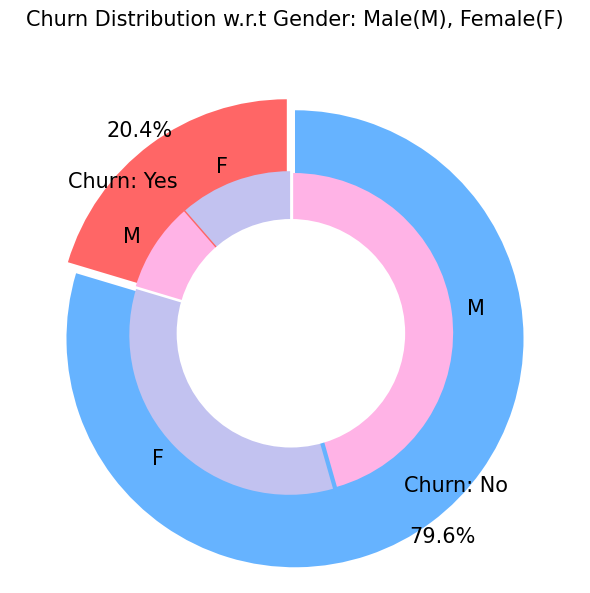

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))

# Tổng churn và không churn
labels = ["Churn: Yes", "Churn: No"]
values = [2037, 7963]

# Phân theo giới tính
labels_gender = ["F", "M", "F", "M"]
sizes_gender = [1139, 898, 3404, 4559]

colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0', '#ffb3e6', '#c2c2f0', '#ffb3e6']
explode = (0.3, 0.3)
explode_gender = (0.1, 0.1, 0.1, 0.1)
textprops = {"fontsize": 15}

# Plot outer pie (churn)
plt.pie(values,
        labels=labels,
        autopct='%1.1f%%',
        pctdistance=1.08,
        labeldistance=0.8,
        colors=colors,
        startangle=90,
        frame=True,
        explode=explode,
        radius=10,
        textprops=textprops,
        counterclock=True)

# Plot inner pie (gender within churn)
plt.pie(sizes_gender,
        labels=labels_gender,
        colors=colors_gender,
        startangle=90,
        explode=explode_gender,
        radius=7,
        textprops=textprops,
        counterclock=True)

# Draw circle
centre_circle = plt.Circle((0, 0), 5, color='black', fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

plt.axis('equal')
plt.tight_layout()
plt.show()


**Nhận xét phân tích**

Kết quả phân tích cho thấy sự khác biệt đáng kể về hành vi rời bỏ giữa hai nhóm giới tính. Cụ thể, mặc dù nam giới chiếm tỷ trọng lớn hơn trong tổng thể khách hàng, tỷ lệ churn ở nhóm nữ lại cao hơn rõ rệt (25.1% so với 16.5% ở nam). Điều này cho thấy giới tính có thể là một yếu tố dự báo churn tiềm năng, và nhóm khách hàng nữ có xu hướng nhạy cảm hơn với các yếu tố ảnh hưởng đến quyết định rời bỏ dịch vụ.

**Đề xuất chiến lược**

Từ phát hiện trên, ngân hàng nên xem xét xây dựng các chính sách chăm sóc và giữ chân khách hàng nữ một cách chủ động hơn. Điều này có thể bao gồm: cá nhân hóa thông điệp truyền thông, tăng cường tương tác qua kênh phù hợp, hoặc cải thiện trải nghiệm dịch vụ theo những đặc điểm mà nhóm khách nữ ưu tiên. Ngoài ra, nên tiến hành phân tích sâu hơn kết hợp với các yếu tố khác như số dư, mức lương, mức độ sử dụng dịch vụ để xác định rõ hơn những đặc điểm phổ biến trong nhóm khách nữ có nguy cơ churn cao, từ đó hỗ trợ chiến lược tiếp cận chính xác và hiệu quả hơn.


<a id = "1111" ></a>
#### **Churn and Products_number**
<a id = "Split" ></a>

In [ ]:
df.groupby(['products_number', 'churn']).size().unstack().fillna(0)

churn,0,1
products_number,,
1,3675.0,1409.0
2,4242.0,348.0
3,46.0,220.0
4,0.0,60.0


In [ ]:
# Tính tổng số khách hàng trong mỗi nhóm products_number
grouped = df.groupby('products_number')['churn'].value_counts(normalize=True).unstack().fillna(0)

# Đổi tên cột cho dễ đọc (0: Không churn, 1: Có churn)
grouped.columns = ['No Churn(%)', 'Churn(%)']

# Hiển thị tỷ lệ churn theo số sản phẩm
print(grouped)


                 No Churn(%)  Churn(%)
products_number                       
1                   0.722856  0.277144
2                   0.924183  0.075817
3                   0.172932  0.827068
4                   0.000000  1.000000


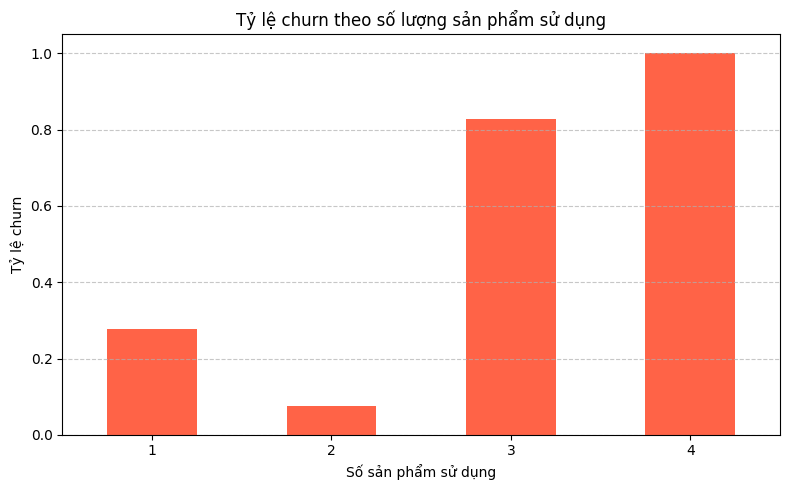

In [ ]:
import matplotlib.pyplot as plt

grouped['Churn(%)'].plot(kind='bar', color='tomato', figsize=(8,5))
plt.title('Tỷ lệ churn theo số lượng sản phẩm sử dụng')
plt.xlabel('Số sản phẩm sử dụng')
plt.ylabel('Tỷ lệ churn')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Nhận xét phân tích **

Kết quả phân tích cho thấy có một mối quan hệ phi tuyến giữa số lượng sản phẩm khách hàng sử dụng và tỷ lệ rời bỏ (churn). Cụ thể:

- Khách hàng sử dụng 2 sản phẩm có tỷ lệ churn thấp nhất (7.6%), cho thấy đây là nhóm ổn định nhất.

- Ngược lại, khách dùng 1 sản phẩm có churn cao hơn (27.7%), có thể là nhóm dùng thử hoặc thiếu gắn kết.

- Đáng chú ý, nhóm khách hàng sử dụng 3 và 4 sản phẩm lại có tỷ lệ churn rất cao (82.7% và 100%), dù họ đang sử dụng nhiều dịch vụ ngân hàng.

Điều này cho thấy rằng số lượng sản phẩm không phản ánh mức độ trung thành – ngược lại, nếu trải nghiệm với các sản phẩm không đồng đều hoặc thiếu giá trị thực tế, khách hàng có thể dễ dàng rời bỏ dù đang sử dụng nhiều dịch vụ cùng lúc. Có thể tồn tại yếu tố như bán chéo quá mức (over-selling), không phù hợp với nhu cầu, hoặc thiếu gắn kết sau khi mở rộng danh mục sản phẩm.

**Chiến lược đề xuất**

Từ phát hiện này, ngân hàng nên:

- Rà soát lại chiến lược cross-sell: kiểm tra xem khách hàng có đang bị “ép” dùng nhiều sản phẩm mà không thực sự cần, dẫn đến thất vọng và rời bỏ.

- Đánh giá chất lượng trải nghiệm toàn kênh (omni-product journey): đảm bảo rằng khi khách dùng nhiều sản phẩm, họ cảm thấy được hỗ trợ đồng bộ và hiệu quả.

- Thiết lập cảnh báo churn sớm cho nhóm khách đang có 3–4 sản phẩm, vì dù họ là nhóm “đa dịch vụ”, rủi ro rời bỏ lại rất cao.

- Tập trung giữ chân nhóm 2 sản phẩm – vốn là nhóm trung thành nhất, bằng cách cung cấp thêm giá trị thay vì tăng số lượng sản phẩm.

<a id = "1111" ></a>
#### **Churn and Country**
<a id = "Split" ></a>

In [ ]:
df.groupby(['country', 'churn']).size().unstack().fillna(0)

churn,0,1
country,,
0,4204,810
1,2064,413
2,1695,814


In [ ]:
# Tính tổng số khách hàng trong mỗi nhóm products_number
Country_grouped = df.groupby('country')['churn'].value_counts(normalize=True).unstack().fillna(0)

# Đổi tên cột cho dễ đọc (0: Không churn, 1: Có churn)
Country_grouped.columns = ['No Churn(%)', 'Churn(%)']

# Hiển thị tỷ lệ churn theo số sản phẩm
print(Country_grouped)

         No Churn(%)  Churn(%)
country                       
0           0.838452  0.161548
1           0.833266  0.166734
2           0.675568  0.324432


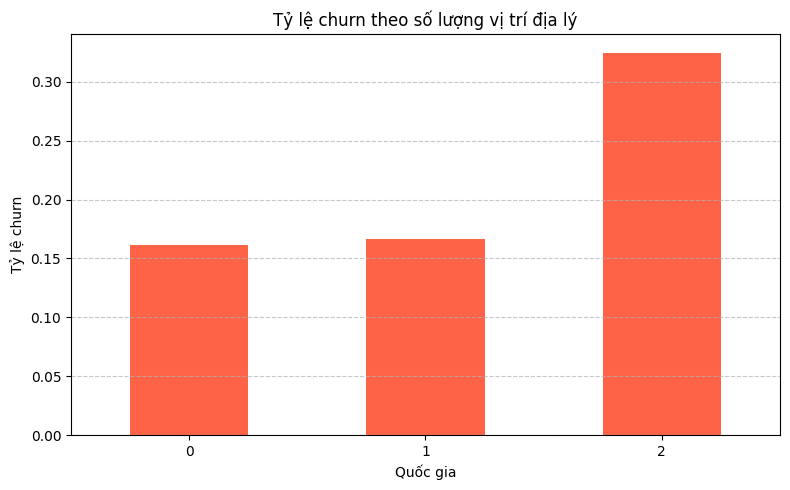

In [ ]:
import matplotlib.pyplot as plt

Country_grouped['Churn(%)'].plot(kind='bar', color='tomato', figsize=(8,5))
plt.title('Tỷ lệ churn theo số lượng vị trí địa lý')
plt.xlabel('Quốc gia')
plt.ylabel('Tỷ lệ churn')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Nhận xét phân tích**

Phân tích churn theo vị trí địa lý cho thấy có sự khác biệt đáng kể giữa các quốc gia:

- France và Spain có tỷ lệ churn tương đối thấp và gần như tương đương (16.1% và 16.7%).

- Tuy nhiên, Germany có tỷ lệ churn cao vượt trội (32.4%) – cao gấp đôi so với hai quốc gia còn lại.

Mặc dù country không thể khẳng định là nguyên nhân trực tiếp gây churn, nhưng sự khác biệt rõ rệt này cho thấy vị trí địa lý là một yếu tố cảnh báo tiềm năng. Có thể khách hàng tại Germany không hài lòng với dịch vụ, gặp rào cản về ngôn ngữ, khác biệt trong hành vi tài chính, hoặc ít được chăm sóc hơn so với khách ở các quốc gia khác.

**Đề xuất chiến lược**

Từ phát hiện trên, ngân hàng nên:

- Tập trung phân tích sâu hơn thị trường Germany, bao gồm: mức độ sử dụng dịch vụ, phản hồi khách hàng, thời gian gắn bó, v.v.

- Thiết kế lại hành trình trải nghiệm khách hàng riêng cho nhóm tại Germany, đảm bảo phù hợp hơn về ngôn ngữ, dịch vụ và nhu cầu thực tế.

- Tăng cường tương tác và chiến dịch giữ chân riêng biệt cho thị trường này – ví dụ: email ưu đãi, khảo sát phản hồi tự động, ưu tiên CSKH.



<a id = "1111" ></a>
#### **Churn, Gender and Country**
<a id = "Split" ></a>

In [ ]:
# Bước 1: Đếm số lượng từng tổ hợp country × churn của nữ
female_churn_df = df[df["male"] == 0][["country", "churn"]].value_counts().reset_index(name='count')

# Bước 2: Tính tổng số khách hàng nữ
total_female = female_churn_df["count"].sum()

# Bước 3: Tính tỷ trọng (%)
female_churn_df["percentage(%)"] = round(female_churn_df["count"] / total_female * 100, 2)

# Hiển thị kết quả
female_churn_df


,country,churn,count,percentage(%)
0,0,0,1801,39.64
1,1,0,858,18.89
2,2,0,745,16.40
3,0,1,460,10.13
4,2,1,448,9.86
5,1,1,231,5.08


In [ ]:
# Bước 1: Đếm từng tổ hợp country × churn của nam
male_churn_df = df[df["male"] == 1][["country", "churn"]].value_counts().reset_index(name='count')

# Bước 2: Tính tổng toàn bộ khách nam
total_male = male_churn_df["count"].sum()

# Bước 3: Thêm cột tỷ lệ phần trăm trên tổng số khách nam
male_churn_df["percentage(%)"] = round(male_churn_df["count"] / total_male * 100, 2)

# Hiển thị kết quả
male_churn_df


,country,churn,count,percentage(%)
0,0,0,2403,44.04
1,1,0,1206,22.10
2,2,0,950,17.41
3,2,1,366,6.71
4,0,1,350,6.41
5,1,1,182,3.34


**Nhận xét phân tích**

Phân tích tỷ lệ churn theo từng tổ hợp giới tính – quốc gia cho thấy có sự khác biệt rõ rệt về hành vi rời bỏ giữa các nhóm:

🔹 Đối với khách hàng nữ:
Tỷ lệ churn nữ cao nhất tại France (country = 0) với 39.6%, vượt xa các quốc gia còn lại.

- Germany (country = 2) đứng thứ hai với 20.4%.

- Spain (country = 1) có tỷ lệ churn nữ thấp nhất (16.4%) và là khu vực tương đối ổn định.

🔹 Đối với khách hàng nam:
- France tiếp tục là quốc gia có tỷ lệ churn cao nhất (44.0%).

- Germany có tỷ lệ churn nam là 16.7%, tương đối thấp so với churn nữ tại cùng quốc gia.

- Đáng chú ý, churn nam tại Spain là 22.1%, cao hơn nữ (16.4%).

Từ kết quả trên, có thể thấy rằng tương tác giữa giới tính và quốc gia ảnh hưởng mạnh đến hành vi churn. Mặc dù quốc gia là biến định tính, các khác biệt lớn về tỷ lệ churn cho thấy quốc gia + giới tính là yếu tố cảnh báo kết hợp rất mạnh, đặc biệt tại France.

Tuy nhiên, cần nhấn mạnh rằng đây không phải là nguyên nhân trực tiếp – mà là một tín hiệu hành vi có thể phản ánh sự khác biệt trong trải nghiệm khách hàng, kỳ vọng dịch vụ hoặc chất lượng chăm sóc tại từng khu vực, từng giới tính.

**Chiến lược đề xuất**

Dựa trên kết quả phân tích, ngân hàng nên triển khai chiến lược theo giới tính – quốc gia:
- France là thị trường có rủi ro churn cao nhất ở cả nam và nữ → cần ưu tiên hành động:

- Thực hiện khảo sát nguyên nhân churn theo giới tính tại France.

- Tăng cường chăm sóc khách hàng chủ động, đặc biệt với nữ giới tại France.

- Rà soát lại chính sách bán hàng, ưu đãi, kênh tương tác riêng cho thị trường này.

- Spain có churn nữ thấp → có thể xem là thị trường ổn định, phù hợp để:

- Triển khai thử nghiệm sản phẩm mới dành cho nữ.

- Duy trì mức hài lòng thông qua ưu đãi duy trì và loyalty program.

- Germany cho thấy churn nữ cao nhưng churn nam thấp → cần đánh giá lại chiến lược truyền thông, kênh bán hàng hoặc dịch vụ đang áp dụng cho nhóm nữ tại đây.

<a id = "1111" ></a>
#### **Churn and Salary**
<a id = "Split" ></a>



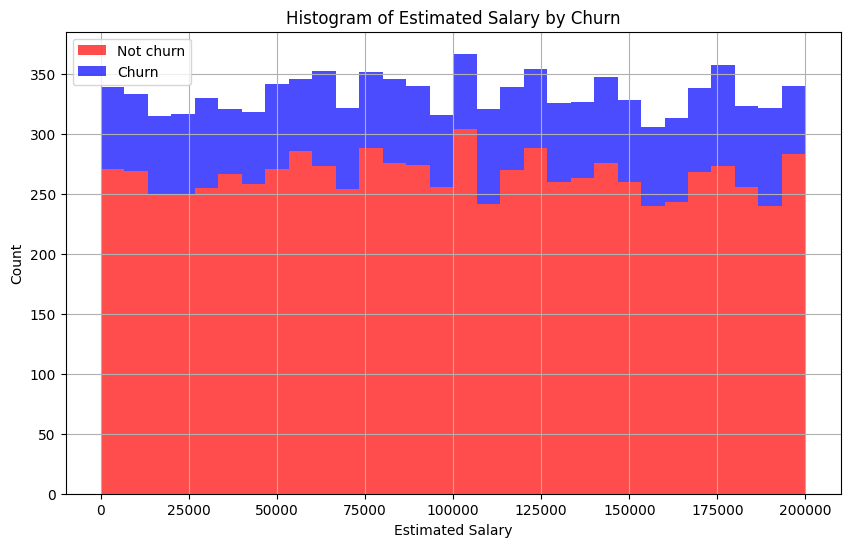

In [ ]:
import matplotlib.pyplot as plt

# Tách dữ liệu theo churn
salary_churn_0 = df[df["churn"] == 0]["estimated_salary"]
salary_churn_1 = df[df["churn"] == 1]["estimated_salary"]

# Vẽ histogram
plt.figure(figsize=(10, 6))
plt.hist([salary_churn_0, salary_churn_1],
         bins=30,
         stacked=True,
         label=["Not churn", "Churn"],
         color=["red", "blue"],
         alpha=0.7)

plt.xlabel("Estimated Salary")
plt.ylabel("Count")
plt.title("Histogram of Estimated Salary by Churn")
plt.legend()
plt.grid(True)
plt.show()


**Nhận xét: Estimated Salary và tỷ lệ Churn**

Biểu đồ histogram thể hiện số lượng khách hàng churn (màu xanh) và không churn (màu đỏ) theo mức thu nhập ước tính (Estimated Salary). Qua biểu đồ, có thể rút ra các nhận định sau:

1. Không có xu hướng rõ rệt theo mức thu nhập:

- Tỷ lệ churn không tăng lên rõ ràng theo chiều tăng của Estimated Salary.

- Ở tất cả các phân khúc thu nhập, số lượng churn (màu xanh) khá ổn định, dao động tương đối đều.

2. Thu nhập cao không đảm bảo giữ chân:

- Nhóm thu nhập cao (trên 150.000) vẫn có churn.

- Ngược lại, nhóm thu nhập thấp vẫn có một phần churn nhất định, cho thấy churn không phụ thuộc tuyến tính vào lương.

3. Không phải là nguyên nhân trực tiếp:

- Vì churn phân bố đồng đều theo mọi phân khúc thu nhập, nên Estimated Salary không phải là yếu tố chính gây churn.

**Chiến lược đề xuất:**

Không ưu tiên phân khúc theo thu nhập:

- Không nên dựa vào mức Estimated Salary để phân loại khách hàng dễ rời đi.

- Thay vào đó, hãy tập trung vào các đặc trưng có sự phân biệt mạnh hơn (như age, active_member, products_number, country × gender...).

Cá nhân hóa đề xuất sản phẩm không dựa vào lương:

- Phân phối giá trị sản phẩm hoặc khuyến mãi nên dựa vào hành vi hoặc mức độ tương tác, không dựa duy nhất vào thu nhập.

<a id = "1111" ></a>
#### **Churn and Balance**
<a id = "Split" ></a>



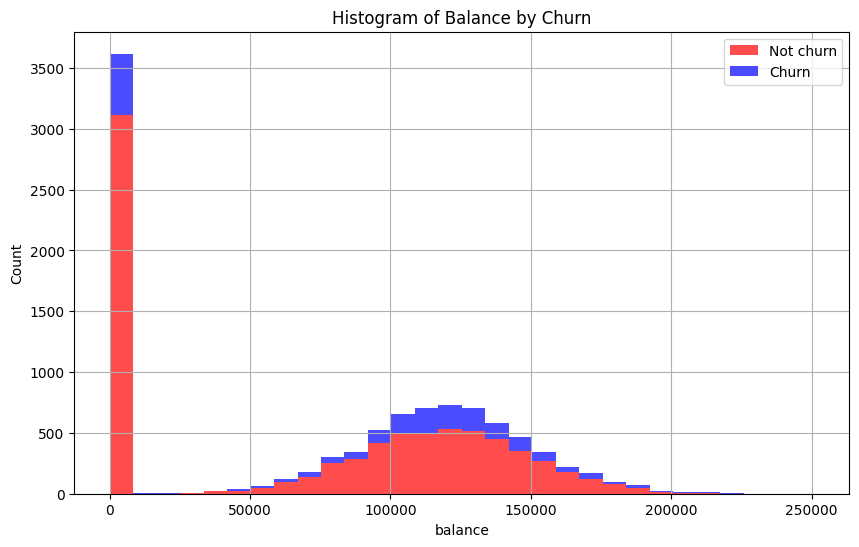

In [ ]:
import matplotlib.pyplot as plt

# Tách dữ liệu theo churn
salary_churn_0 = df[df["churn"] == 0]["balance"]
salary_churn_1 = df[df["churn"] == 1]["balance"]

# Vẽ histogram
plt.figure(figsize=(10, 6))
plt.hist([salary_churn_0, salary_churn_1],
         bins=30,
         stacked=True,
         label=["Not churn", "Churn"],
         color=["red", "blue"],
         alpha=0.7)

plt.xlabel("balance")
plt.ylabel("Count")
plt.title("Histogram of Balance by Churn")
plt.legend()
plt.grid(True)
plt.show()


**Nhận xét: Số dư tài khoản (Balance) và tỷ lệ Churn**

Biểu đồ histogram thể hiện mối quan hệ giữa số dư tài khoản (balance) và churn. Các nhận định chính:

1. Phân bố rất rõ ở hai nhóm tách biệt:

- Nhóm đầu tiên: Balance = 0 – chiếm tỷ lệ rất lớn (~3500 người), với đa số là không churn.

- Nhóm còn lại: Balance > 0 có dạng phân bố chuẩn, với churn trải đều hơn.

2. Tỷ lệ churn cao hơn khi số dư cao:

- Tại các mức balance cao (trên 75.000), ta thấy tỷ lệ churn (màu xanh) xuất hiện nhiều hơn so với nhóm balance = 0.

- Điều này ngụ ý rằng những khách hàng có tiền trong tài khoản lại dễ rời đi hơn – một nghịch lý cần quan tâm.

3. Balance là yếu tố có ảnh hưởng đến churn:

- Không phải là yếu tố duy nhất, nhưng có vai trò cảnh báo churn cao đặc biệt ở nhóm khách hàng đang có số dư cao.

**Chiến lược đề xuất:**

Phân nhóm khách hàng theo balance để giám sát churn:

- Nhóm balance > 50.000 nên được đưa vào danh sách theo dõi churn.

- Khảo sát lý do churn ở nhóm giàu tiền:

Cá nhân hóa chăm sóc khách hàng theo balance:

- Tăng cường ưu đãi, dịch vụ tài chính đặc thù cho nhóm balance cao nhằm nâng trải nghiệm và giữ chân.

<a id = "1111" ></a>
#### **Churn and Tenure**
<a id = "Split" ></a>



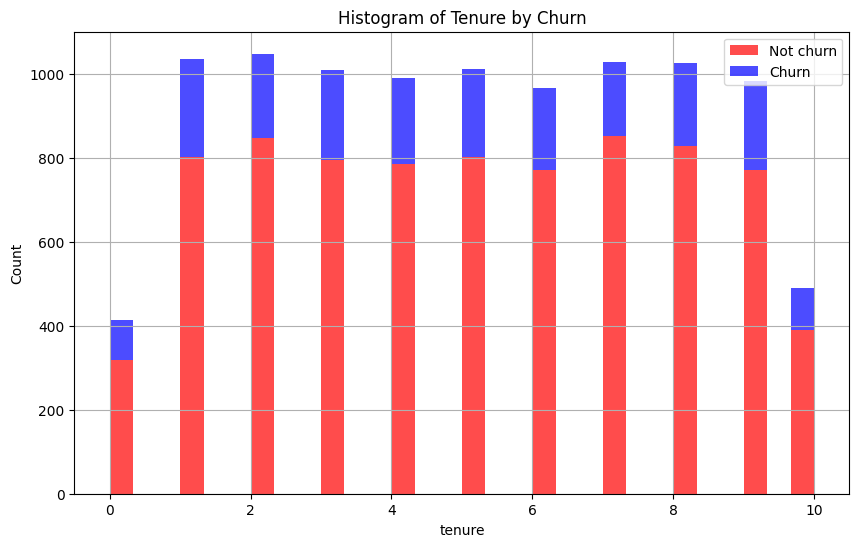

In [ ]:
import matplotlib.pyplot as plt

# Tách dữ liệu theo churn
salary_churn_0 = df[df["churn"] == 0]["tenure"]
salary_churn_1 = df[df["churn"] == 1]["tenure"]

# Vẽ histogram
plt.figure(figsize=(10, 6))
plt.hist([salary_churn_0, salary_churn_1],
         bins=30,
         stacked=True,
         label=["Not churn", "Churn"],
         color=["red", "blue"],
         alpha=0.7)

plt.xlabel("tenure")
plt.ylabel("Count")
plt.title("Histogram of Tenure by Churn")
plt.legend()
plt.grid(True)
plt.show()


**Nhận xét:**

Biểu đồ histogram thể hiện sự phân bố balance giữa hai nhóm churn và không churn cho thấy một điểm đáng lưu ý: phần lớn khách hàng có balance = 0, và trong nhóm này, tỷ lệ churn khá cao. Đây là một tín hiệu cho thấy khách hàng không sử dụng tài khoản để giữ tiền hoặc không có giao dịch tài chính thực chất, dẫn đến nguy cơ rời bỏ cao hơn. Trong khi đó, ở nhóm khách hàng có balance từ trung bình đến cao (khoảng 70.000–150.000), tỷ lệ churn giảm rõ rệt và nhóm này chủ yếu là khách hàng trung thành. Điều này cho thấy balance thấp (đặc biệt là bằng 0) có thể là một yếu tố nguyên nhân góp phần làm tăng churn, phản ánh mức độ tương tác thấp giữa khách hàng và ngân hàng.

**Chiến lược:**

Kích hoạt khách hàng có balance thấp hoặc bằng 0:

- Tự động phát hiện nhóm này và triển khai các chiến dịch "kích hoạt lại", ví dụ như gửi thông báo nhắc nhở, ưu đãi nạp tiền đầu tiên, tặng voucher nếu số dư vượt mức tối thiểu.

- Gợi ý các dịch vụ phù hợp như tiết kiệm tự động, hoàn tiền khi sử dụng thẻ từ tài khoản chính.

Cá nhân hóa sản phẩm cho nhóm có giao dịch thấp:

-  kế các sản phẩm đơn giản, phí thấp hoặc miễn phí quản lý tài khoản để phù hợp với khách chưa có nhu cầu tài chính phức tạp.

- Gửi email/ứng dụng push notification giới thiệu tính năng mới và cách tận dụng tài khoản hiệu quả hơn.

Đưa balance = 0 vào hệ thống cảnh báo churn sớm:

- Sử dụng balance như một biến quan trọng trong mô hình machine learning dự đoán churn. Những người có balance = 0 liên tục trên 30–60 ngày có thể được đánh cờ và ưu tiên chăm sóc.

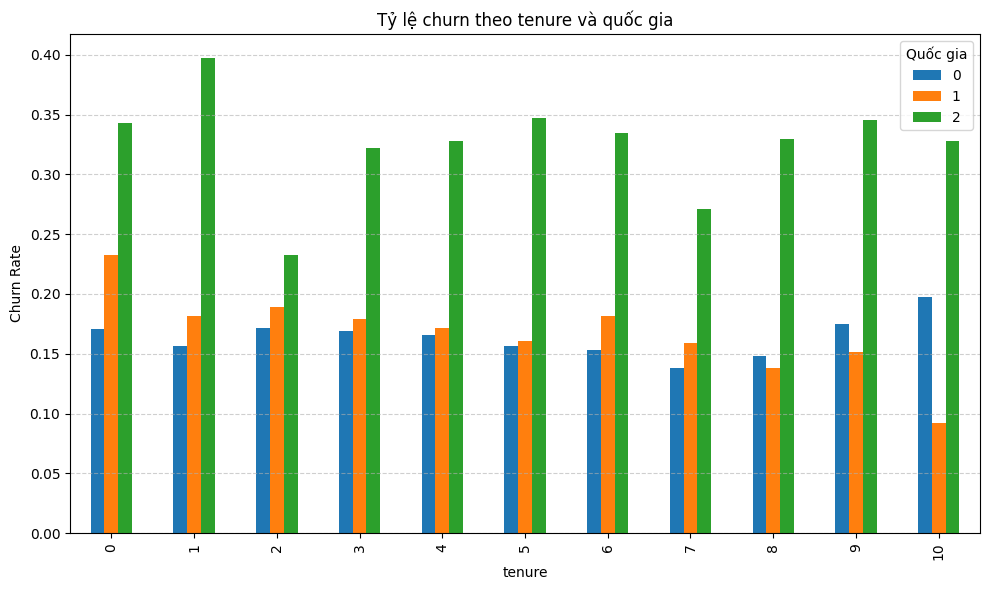

In [ ]:
df.groupby(['tenure', 'country'])['churn'].mean().unstack().plot(kind='bar', figsize=(10,6))
plt.title('Tỷ lệ churn theo tenure và quốc gia')
plt.ylabel('Churn Rate')
plt.xlabel('tenure')
plt.legend(title='Quốc gia')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**Nhận xét:**

Germany (quốc gia 2) có tỷ lệ churn cao nhất ở mọi mức tenure (30–40%), cho thấy vấn đề nằm ở chất lượng dịch vụ, không phụ thuộc thời gian gắn bó.

France (0) và Spain (1) có churn thấp và ổn định hơn, nhưng churn vẫn cao ở nhóm tenure = 0–1, cho thấy đây là giai đoạn dễ mất khách.

Tenure càng thấp, churn càng cao ở cả 3 quốc gia, đặc biệt là trong 1 năm đầu.

**Chiến lược ngắn gọn:**

Germany: Rà soát dịch vụ, tăng tương tác cá nhân hóa, khảo sát sớm sau 1–2 tháng.

France & Spain: Giữ chiến lược hiện tại, tập trung giữ chân nhóm mới (tenure 0–2).

Tạo cảnh báo churn sớm cho nhóm tenure thấp.

Đưa biến tenure × country vào mô hình churn prediction.

<a id = "1111" ></a>
#### **Churn and Age**
<a id = "Split" ></a>



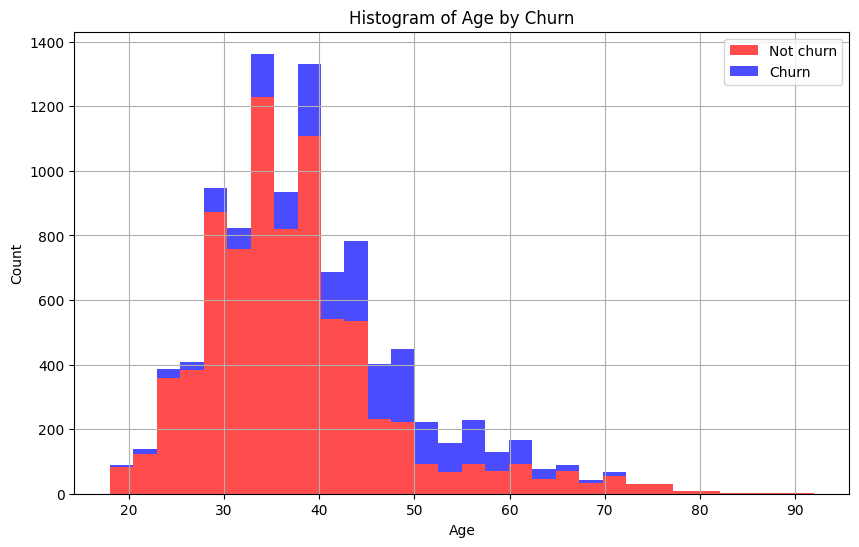

In [ ]:
import matplotlib.pyplot as plt

# Tách dữ liệu theo churn
salary_churn_0 = df[df["churn"] == 0]["age"]
salary_churn_1 = df[df["churn"] == 1]["age"]

# Vẽ histogram
plt.figure(figsize=(10, 6))
plt.hist([salary_churn_0, salary_churn_1],
         bins=30,
         stacked=True,
         label=["Not churn", "Churn"],
         color=["red", "blue"],
         alpha=0.7)

plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Histogram of Age by Churn")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Phân nhóm độ tuổi
bins = [18, 30, 40, 50, 60, 100]
labels = ['<30', '30-40', '40-50', '50-60', '60+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)


In [ ]:
# Đếm churn theo nhóm tuổi
age_churn = df.groupby('age_group')['churn'].value_counts(normalize=True).unstack().fillna(0)
age_churn.columns = ['No Churn (%)', 'Churn (%)']
age_churn['Churn (%)'] = age_churn['Churn (%)'] * 100
age_churn['No Churn (%)'] = age_churn['No Churn (%)'] * 100

print(age_churn)


           No Churn (%)  Churn (%)
age_group                         
<30           92.443632   7.556368
30-40         89.116429  10.883571
40-50         69.213140  30.786860
50-60         43.958573  56.041427
60+           72.053232  27.946768


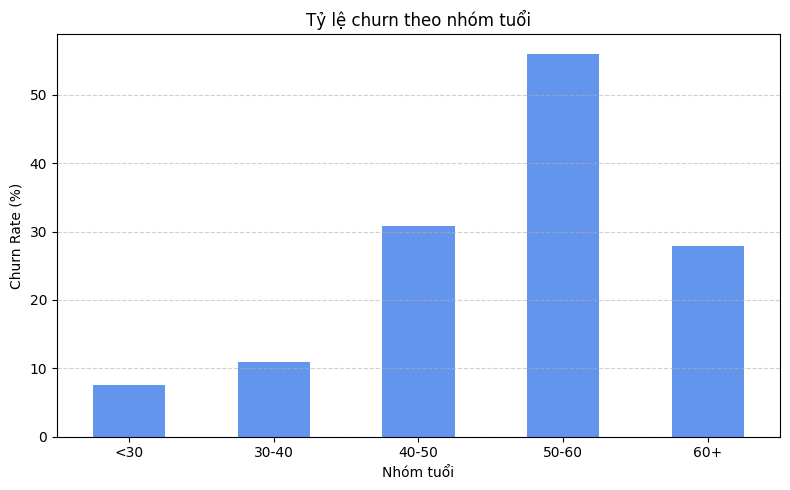

In [ ]:
plt.figure(figsize=(8,5))
age_churn['Churn (%)'].plot(kind='bar', color='cornflowerblue')
plt.title('Tỷ lệ churn theo nhóm tuổi')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Nhóm tuổi')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**Nhận xét ngắn gọn:**

Nhóm tuổi 50–60 có churn cao nhất (gần 55%), cao gấp 5 lần nhóm dưới 30. Đây là dấu hiệu cảnh báo rõ ràng về rủi ro mất khách trong nhóm này.

Nhóm 40–50 và 60+ cũng có churn đáng kể (~25–30%), tuy không cao bằng 50–60.

Khách hàng dưới 40 tuổi có tỷ lệ churn thấp nhất, ổn định.

Điều này không hẳn là nguyên nhân trực tiếp, nhưng là yếu tố cảnh báo mạnh mẽ về hành vi rời đi theo độ tuổi. Có thể nhóm lớn tuổi có kỳ vọng khác hoặc không quen với dịch vụ số hóa.

**Chiến lược đề xuất:**

Ưu tiên giữ chân nhóm 50–60 bằng cách:

Gọi điện/CSKH cá nhân hóa,

Giao diện thân thiện, đơn giản hóa quy trình,

Giảm phí/hỗ trợ hướng dẫn trực tiếp.

Xây dựng gói dịch vụ riêng theo tuổi: linh hoạt với nhóm >50 tuổi, trải nghiệm đơn giản hơn.

Giữ vững nhóm trẻ (<40) bằng tiếp tục đẩy mạnh digital, gamification, mobile-first.



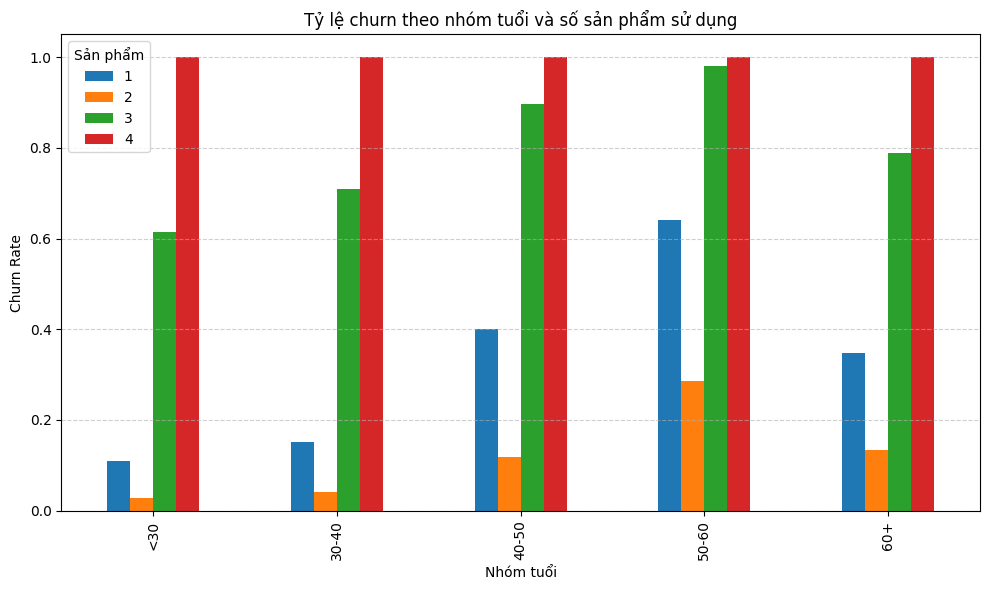

In [ ]:
df.groupby(['age_group', 'products_number'])['churn'].mean().unstack().plot(kind='bar', figsize=(10,6))
plt.title('Tỷ lệ churn theo nhóm tuổi và số sản phẩm sử dụng')
plt.ylabel('Churn Rate')
plt.xlabel('Nhóm tuổi')
plt.legend(title='Sản phẩm')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**Nhận xét:**

Sử dụng 4 sản phẩm có tỷ lệ churn gần như tuyệt đối (≈100%) ở mọi nhóm tuổi, đặc biệt nghiêm trọng.
→ Đây khả năng cao là dấu hiệu cảnh báo hoặc nguyên nhân: khách hàng đa sản phẩm gặp trải nghiệm tệ hoặc không có sự gắn kết.

Nhóm tuổi <30 và 30–40 sử dụng 1–2 sản phẩm có churn rất thấp, đặc biệt ổn định.

Từ tuổi 40+ trở đi, churn tăng theo số sản phẩm: 1 → 2 → 3 → 4.

Dù ở độ tuổi nào, càng dùng nhiều sản phẩm, churn càng tăng.

**Chiến lược:**

Rà soát toàn bộ hành trình khách hàng nhóm sử dụng 4 sản phẩm:

- Tìm hiểu điểm đứt gãy, lỗi dịch vụ, hoặc bất mãn khi dùng đồng thời nhiều sản phẩm.

- Triển khai khảo sát riêng hoặc phỏng vấn định tính nhóm này.

Chống churn sớm cho khách hàng từ 3 sản phẩm trở lên:

- Gắn cờ cảnh báo trong CRM.

- CSKH chủ động gọi điện/CSKH riêng theo từng gói combo.

Đánh giá lại chiến lược bán chéo (cross-sell):

- Không chỉ đẩy số lượng, mà cần đảm bảo trải nghiệm tích hợp và giá trị nhận được tăng lên theo từng sản phẩm.

Tùy chỉnh gói dịch vụ theo độ tuổi + số sản phẩm:

- Khách hàng lớn tuổi có thể cần giao diện đơn giản, quy trình rõ ràng, hỗ trợ chuyên biệt hơn khi dùng nhiều sản phẩm.

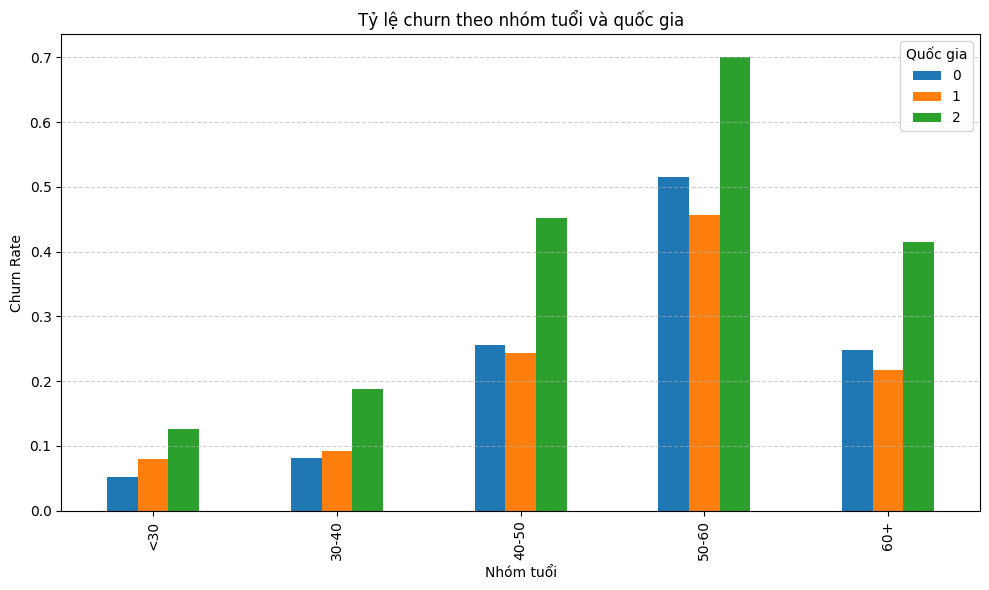

In [ ]:
df.groupby(['age_group', 'country'])['churn'].mean().unstack().plot(kind='bar', figsize=(10,6))
plt.title('Tỷ lệ churn theo nhóm tuổi và quốc gia')
plt.ylabel('Churn Rate')
plt.xlabel('Nhóm tuổi')
plt.legend(title='Quốc gia')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**Nhận xét:**

Quốc gia 2 (Germany) có tỷ lệ churn cao nhất ở mọi nhóm tuổi, đặc biệt cao vọt ở nhóm 50–60 tuổi (~70%).
→ Đây có thể là nguyên nhân quan trọng dẫn đến tổng churn toàn tập cao.

Quốc gia 1 (Spain) có churn thấp nhất và ổn định nhất mọi nhóm tuổi.

Nhóm 50–60 tuổi có churn cao nhất ở cả ba quốc gia, cho thấy độ tuổi trung niên có nguy cơ churn cao nhất.

Riêng quốc gia 0 (France), churn tăng đều từ <30 đến 50–60 rồi giảm ở nhóm 60+ → Có thể do cơ cấu khách hàng khác biệt.

**Chiến lược:**

Tập trung chiến dịch giữ chân tại Germany:

- Ưu tiên nhóm tuổi 40–60.

-  Triển khai khảo sát nguyên nhân churn riêng cho thị trường này.

- Kiểm tra chất lượng dịch vụ, độ phù hợp sản phẩm và trải nghiệm khách hàng tại Germany.

Cá nhân hóa dịch vụ theo độ tuổi:

- Với nhóm 50–60: Thiết kế ưu đãi chăm sóc sức khỏe, bảo hiểm, hoặc kế hoạch tài chính.

- Dễ hiểu, ít thao tác, hỗ trợ nhanh – giảm rào cản công nghệ với nhóm trung niên.

- Học hỏi từ Spain – quốc gia có churn thấp:

- Phân tích những chiến lược CSKH và sản phẩm tại Spain có thể nhân rộng cho France/Germany.

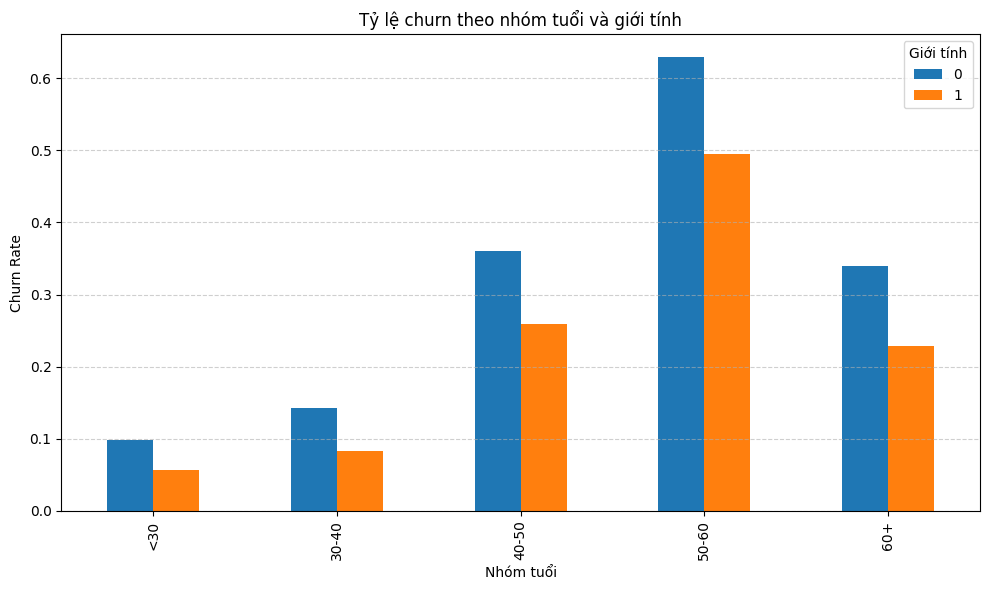

In [ ]:
df.groupby(['age_group', 'male'])['churn'].mean().unstack().plot(kind='bar', figsize=(10,6))
plt.title('Tỷ lệ churn theo nhóm tuổi và giới tính')
plt.ylabel('Churn Rate')
plt.xlabel('Nhóm tuổi')
plt.legend(title='Giới tính')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Nhận xét:
**văn bản in đậm**
Nữ giới có tỷ lệ churn cao hơn nam giới ở mọi nhóm tuổi, đặc biệt từ 40 tuổi trở lên. Nhóm nữ giới 50–60 tuổi có churn rate cao nhất toàn bộ tập dữ liệu, cho thấy đây là một nhóm rủi ro cao cần theo dõi sát.

Đây chưa chắc là nguyên nhân trực tiếp, nhưng là tín hiệu rõ ràng cần được kiểm tra bằng mô hình hồi quy đa biến để xác định vai trò độc lập.

**Chiến lược:**

- Tập trung giữ chân nữ giới từ 40 tuổi trở lên bằng:

- Tư vấn 1-1, ưu đãi theo nhu cầu cá nhân (sức khỏe, tài chính, thời gian).

- Thiết kế chương trình chăm sóc khách hàng riêng cho nhóm tuổi trung niên nữ.

- Gửi khảo sát chuyên biệt để hiểu rõ nguyên nhân churn của nhóm này.

- Triển khai cảnh báo churn sớm cho khách hàng nữ > 40 tuổi với điểm churn cao.




<a id = "1111" ></a>
#### **Distribution**
<a id = "Split" ></a>

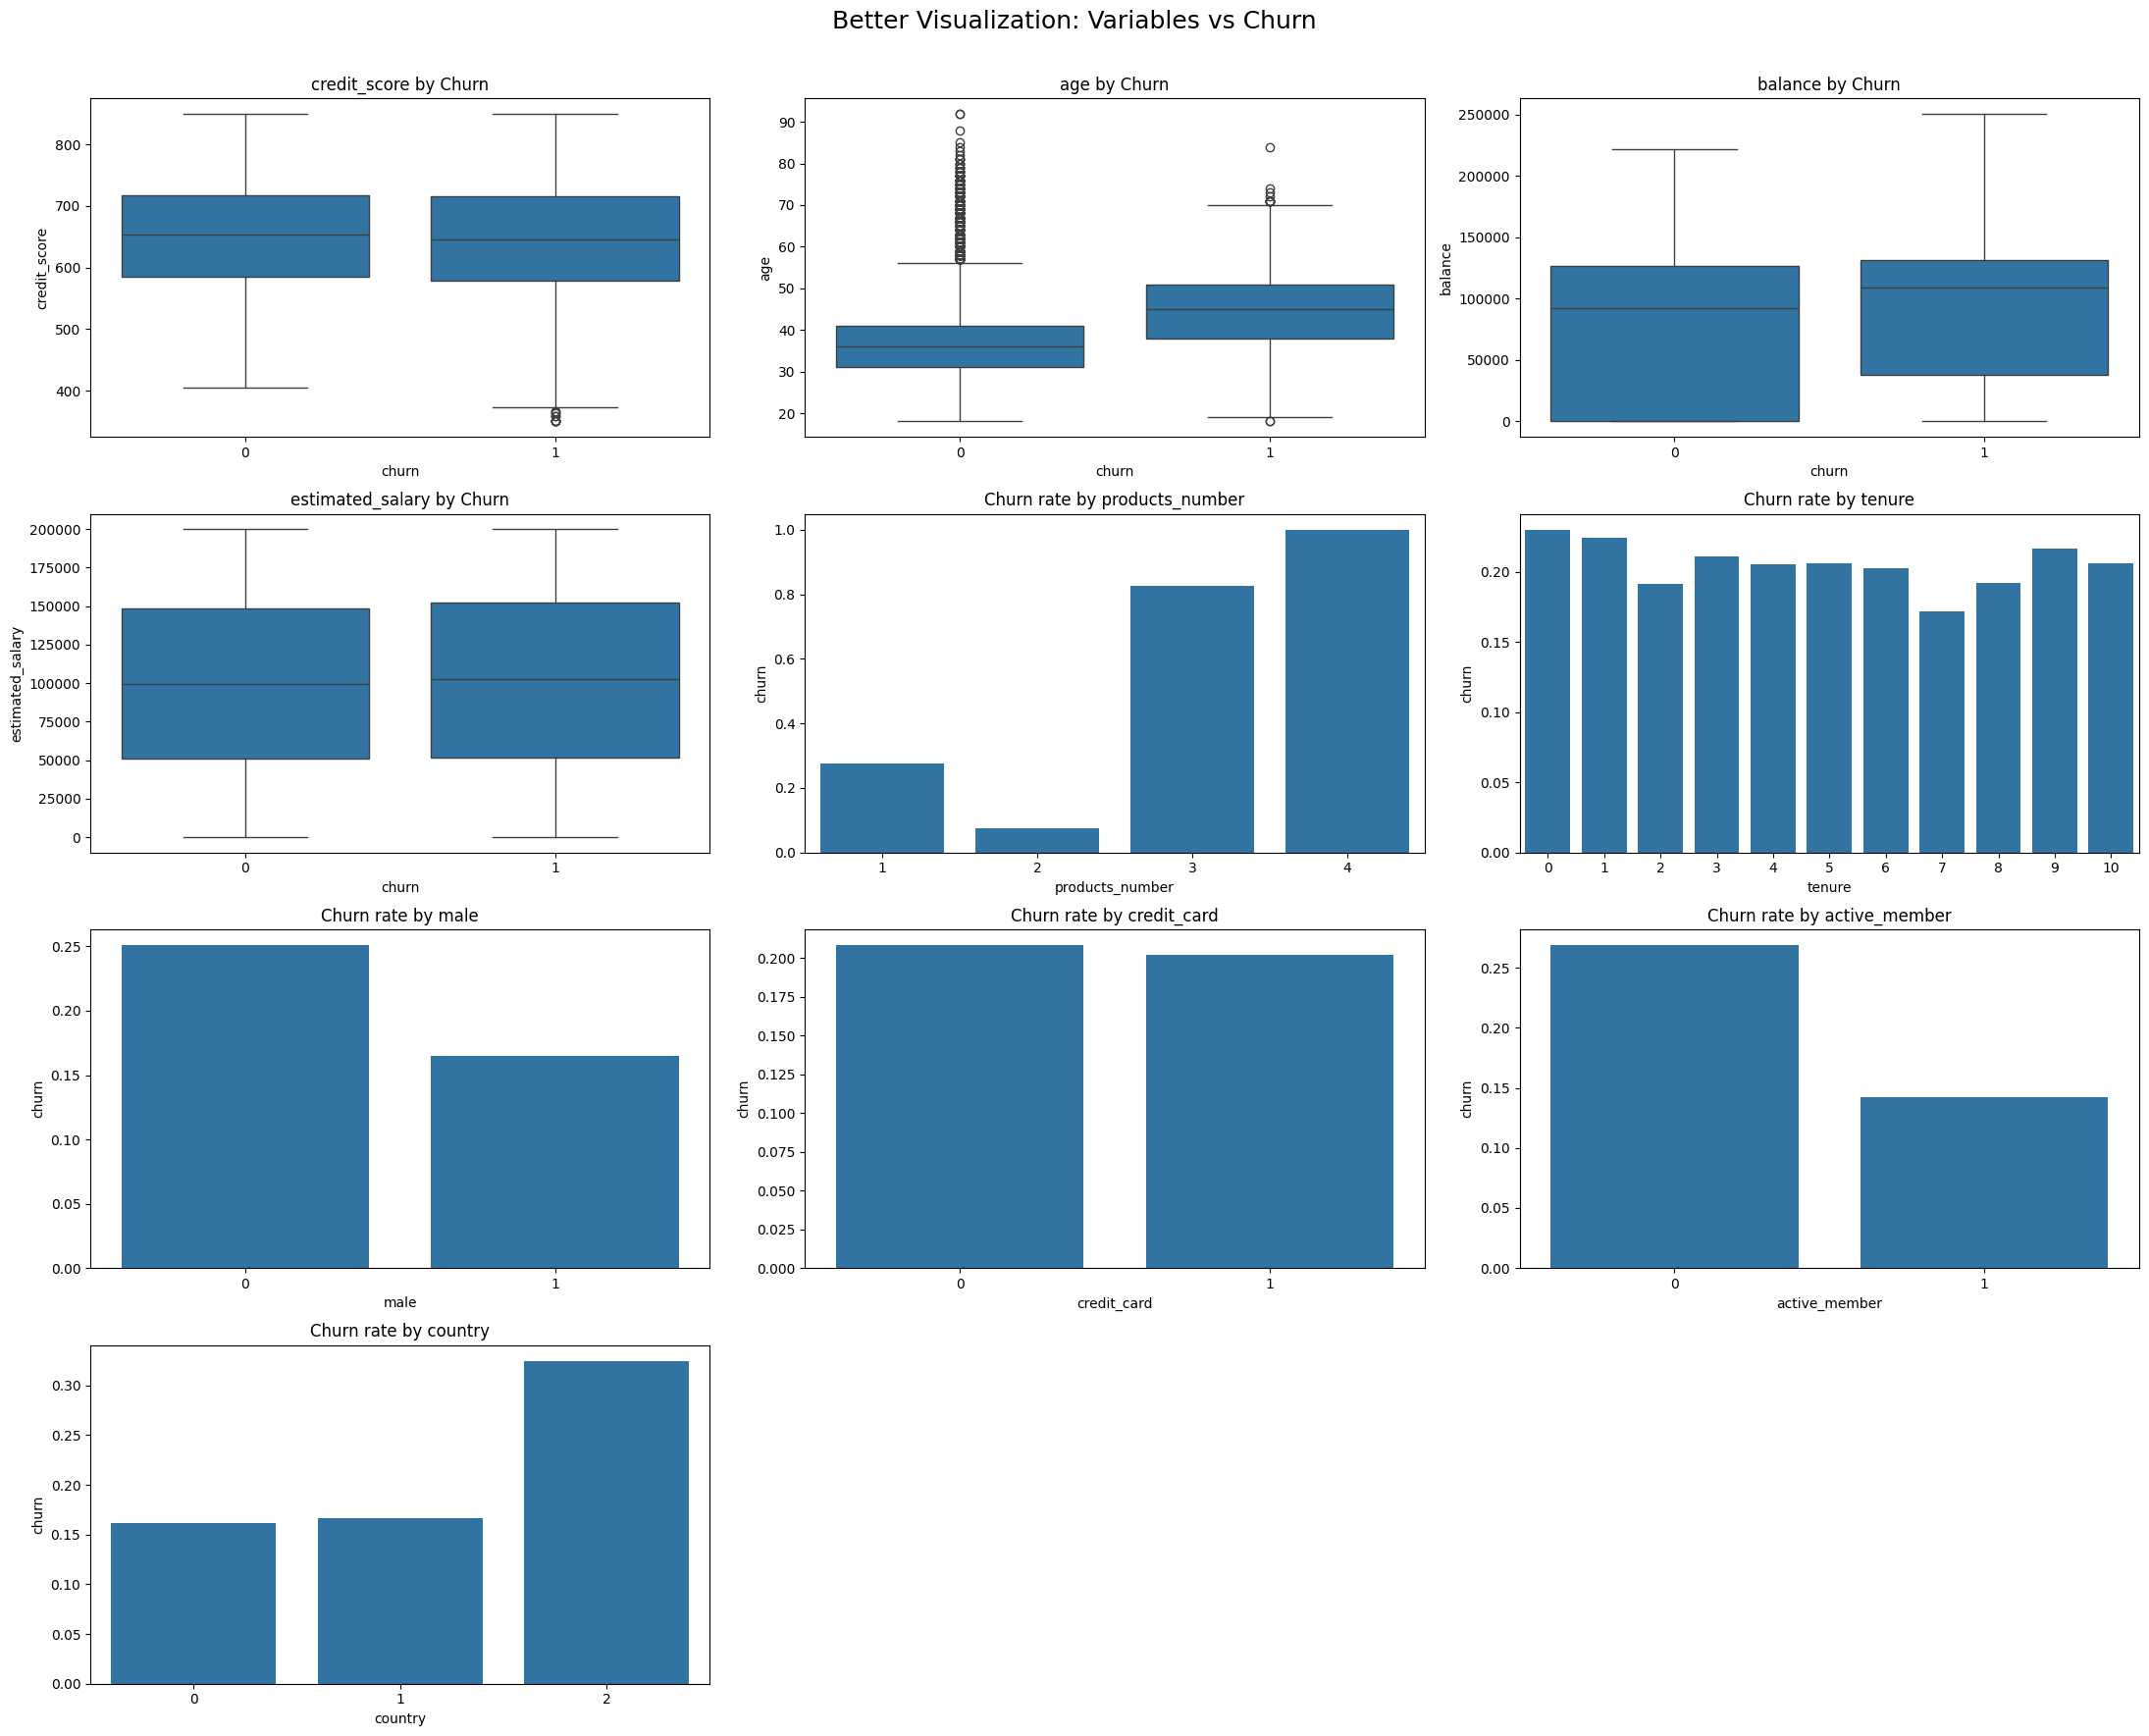

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

continuous_vars = ['credit_score', 'age', 'balance', 'estimated_salary']
categorical_vars = ['products_number', 'tenure', 'male', 'credit_card', 'active_member', 'country']

fig, axes = plt.subplots(4, 3, figsize=(22, 18))  # 4 hàng x 3 cột để đủ chỗ
fig.suptitle('Better Visualization: Variables vs Churn', fontsize=18)

# Flatten axes để dễ indexing hơn
axes = axes.flatten()

# Plot continuous variables với boxplot
for i, var in enumerate(continuous_vars):
    sns.boxplot(x='churn', y=var, data=df, ax=axes[i])
    axes[i].set_title(f'{var} by Churn')

# Plot categorical variables với barplot
for j, var in enumerate(categorical_vars):
    sns.barplot(x=var, y='churn', data=df, ax=axes[j + len(continuous_vars)], ci=None)
    axes[j + len(continuous_vars)].set_title(f'Churn rate by {var}')

# Ẩn các ô thừa nếu có
for k in range(len(continuous_vars) + len(categorical_vars), len(axes)):
    fig.delaxes(axes[k])

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()


**Phân tích mối quan hệ giữa các biến độc lập và tỷ lệ rời bỏ khách hàng (Churn)**

Biểu đồ trực quan hóa mối quan hệ giữa các biến độc lập và biến mục tiêu churn cho thấy một số xu hướng đáng chú ý, có thể giúp xác định những yếu tố liên quan đến hành vi rời bỏ của khách hàng:

1. Các biến liên tục
- Credit Score: Không có sự khác biệt rõ rệt về điểm tín dụng giữa nhóm khách hàng rời bỏ và không rời bỏ. Do đó, biến này có thể không phải là yếu tố quan trọng trong việc dự báo churn.

- Age: Có sự phân hóa đáng kể. Nhóm khách hàng có độ tuổi cao hơn (trên 50 tuổi) có xu hướng rời bỏ cao hơn. Điều này cho thấy tuổi là một biến quan trọng cần được xem xét trong mô hình dự đoán churn.

- Balance: Nhóm khách hàng có số dư tài khoản cao hơn có tỷ lệ churn cao hơn. Đây có thể là nhóm khách hàng có giá trị lớn nhưng ít sử dụng dịch vụ thường xuyên, dẫn đến khả năng rời bỏ cao.

- Estimated Salary: Mức lương ước tính không cho thấy sự khác biệt rõ rệt giữa hai nhóm churn và non-churn. Điều này cho thấy biến này có thể không đóng vai trò quan trọng trong việc giải thích churn.

2. Các biến phân loại và nhị phân

- Products Number: Biến này có mối tương quan rất rõ với churn. Khách hàng sở hữu nhiều hơn 2 sản phẩm có tỷ lệ churn cao vượt trội. Đây là một tín hiệu đáng quan ngại và cần được phân tích sâu thêm — có thể những khách hàng này không hài lòng với sản phẩm hoặc gặp khó khăn trong quản lý nhiều dịch vụ cùng lúc.

- Tenure: Số năm gắn bó với ngân hàng không cho thấy xu hướng rõ ràng liên quan đến churn. Churn xảy ra khá đều ở tất cả các nhóm tenure, cho thấy biến này không có nhiều sức mạnh phân biệt.

- Gender (Male): Tỷ lệ churn ở khách hàng nam có xu hướng thấp hơn nữ, tuy nhiên sự chênh lệch không quá lớn.

- Credit Card: Việc khách hàng có hay không có thẻ tín dụng không ảnh hưởng đáng kể đến tỷ lệ churn.

- Active Member: Đây là một trong những biến quan trọng nhất. Khách hàng không hoạt động có tỷ lệ churn cao gấp nhiều lần so với khách hàng hoạt động. Biến này có thể được sử dụng như một chỉ báo mạnh trong mô hình phân loại churn.

- Country: Tỷ lệ churn khác nhau rõ rệt giữa các quốc gia. Đặc biệt, nhóm quốc gia có mã 2 có tỷ lệ churn cao hơn hẳn so với hai nhóm còn lại. Việc xác định ý nghĩa của mã hóa country sẽ giúp hiểu rõ hơn về yếu tố địa lý và văn hóa trong hành vi rời bỏ.

**Kết luận**

- Dựa trên biểu đồ, các biến age, products_number, active_member và country cho thấy mối liên hệ mạnh với churn và nên được ưu tiên trong phân tích cũng như mô hình dự báo. Trong khi đó, các biến như credit_score, estimated_salary, tenure hay credit_card thể hiện mối liên hệ yếu và có thể được xem xét loại bỏ hoặc sử dụng ở mức độ thấp hơn trong phân tích nâng cao.


___

<a id = "1111" ></a>
#### **Conclusion - EDA**
<a id = "Split" ></a>

**Nguyên nhân chính dẫn đến churn**

Phân tích đa chiều theo giới tính, sản phẩm sử dụng, quốc gia, và tuổi tác cho thấy churn không đến từ một yếu tố đơn lẻ mà là sự kết hợp của nhiều yếu tố cấu trúc, trong đó nổi bật lên 3 nguyên nhân chính:

1. Cơ cấu giới tính và độ tuổi – rủi ro tích lũy ở nhóm nữ trung niên
Nữ giới có tỷ lệ churn cao hơn rõ rệt ở tất cả nhóm tuổi.

- Đặc biệt, nhóm nữ từ 50–60 tuổi có churn rate cao nhất toàn bộ dữ liệu (~63%).

- Điều này cho thấy: giới tính + độ tuổi là một tổ hợp mang tính cảnh báo churn mạnh. Có thể do:

- Thiếu sản phẩm phù hợp với nhu cầu độ tuổi trung niên.

- Chăm sóc khách hàng chưa đủ cá nhân hóa cho nữ giới lớn tuổi.

2. Số lượng sản phẩm – nghịch lý đa sản phẩm

- Khách hàng sử dụng 3–4 sản phẩm lại có tỷ lệ churn cực cao (82.7%–100%), trái ngược với kỳ vọng rằng khách hàng dùng nhiều sản phẩm sẽ trung thành hơn.

- Điều này phản ánh: bán chéo (cross-selling) chưa đi kèm trải nghiệm khách hàng hoặc hệ sinh thái sản phẩm thiếu sự gắn kết.

3. Yếu tố địa lý – thị trường Germany rủi ro cao

- Germany có tỷ lệ churn gấp đôi France và Spain (~32% so với ~16%).

- Đặc biệt, churn cao hơn nữa ở nhóm có tenure ngắn (0–1 năm), cho thấy trải nghiệm ban đầu tại thị trường này chưa tốt.

**Chiến lược chuyên sâu theo từng nhóm nguyên nhân**

Nhóm 1: Nữ giới trung niên (50–60 tuổi)

- Cá nhân hóa dịch vụ: phát triển các gói dịch vụ tài chính, tiết kiệm, sức khỏe, bảo hiểm phù hợp với nhu cầu lứa tuổi.

- CSKH chuyên biệt theo độ tuổi: tổ chức chương trình chăm sóc riêng, hotline ưu tiên, khảo sát chuyên sâu.

Nhóm 2: Khách hàng dùng 3–4 sản phẩm

- Rà soát chất lượng tích hợp sản phẩm: kiểm tra xem sản phẩm có đang gây phiền toái không (giao diện, thanh toán, dịch vụ…).

- Thiết lập hệ sinh thái trải nghiệm: tạo dashboard thống nhất, tài khoản liên kết, tổng đài hỗ trợ riêng cho khách hàng đa sản phẩm.

- Theo dõi hành vi sử dụng đa kênh để phát hiện sớm dấu hiệu churn (ít tương tác, khiếu nại, giảm tần suất dùng).

Nhóm 3: Khách hàng tại Germany có tenure < 1 năm
- Cải thiện onboarding: đơn giản hóa quy trình đăng ký, hướng dẫn rõ ràng, gọi điện xác nhận hài lòng trong 7 ngày đầu.

- Chính sách đảm bảo trải nghiệm: miễn phí tháng đầu, hỗ trợ hoàn tiền, cam kết hài lòng cho khách hàng mới.

- Phân tích phản hồi khách hàng Germany để hiểu yếu tố gây khó chịu.

<a id = "10" ></a>
# <span style="font-family:serif; font-size:28px;"> Data Preprocessing</span>
<a id = "datapreprocessing" ></a>

<a id = "1111" ></a>
#### **Splitting the data into train and test sets**
<a id = "Split" ></a>

In [ ]:
df.drop(columns=['age_group'], inplace=True)


In [ ]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [ ]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,credit_score,country,male,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
plt.figure(figsize=(14,7))
df.corr()['churn'].sort_values(ascending = False)

,churn
churn,1.000000
age,0.285323
country,0.153771
balance,0.118533
estimated_salary,0.012097
credit_card,-0.007138
tenure,-0.014001
credit_score,-0.027094
products_number,-0.047820
male,-0.106512


<Figure size 1400x700 with 0 Axes>

1. Những biến có tương quan dương với churn:

- Age (0.285): Tuổi có mối tương quan dương tương đối mạnh với khả năng rời bỏ dịch vụ, cho thấy khách hàng càng lớn tuổi thì xu hướng churn càng cao. Điều này có thể phản ánh sự thay đổi nhu cầu tài chính hoặc mức độ hài lòng giảm theo thời gian.

- Country (0.15): Khác biệt theo quốc gia cũng có ảnh hưởng đến churn, hàm ý rằng yếu tố văn hóa, địa lý hoặc chính sách nội địa có thể ảnh hưởng đến quyết định giữ chân khách hàng.

- Balance (0.12): Mức số dư tài khoản càng cao thì churn càng cao, có thể là do khách hàng giàu có thường có nhiều lựa chọn đầu tư hơn.

- Estimated Salary (0.01): Mặc dù có tương quan dương, nhưng mức độ ảnh hưởng rất thấp và gần như không đáng kể.

2. Những biến có tương quan âm với churn:
Active Member (-0.16): Khách hàng còn đang hoạt động thường có xác suất churn thấp hơn, điều này phản ánh sự gắn bó với dịch vụ.

- Male (-0.11): Giới tính nam có xu hướng rời bỏ ít hơn nữ, nhưng mức độ ảnh hưởng không quá lớn.

- Products Number (-0.047): Số lượng sản phẩm mà khách hàng sử dụng có tương quan âm, cho thấy khách hàng càng sử dụng nhiều dịch vụ thì càng trung thành.

- Credit Score (-0.027): Điểm tín dụng có ảnh hưởng nhỏ, nhưng vẫn cho thấy khách hàng có tín nhiệm cao thường ổn định hơn.

- Tenure (-0.014): Thời gian gắn bó với ngân hàng càng lâu thì churn càng thấp, nhưng mối quan hệ khá yếu.

3. Biến không ảnh hưởng đáng kể:

- Credit Card (-0.007): Có hoặc không có thẻ tín dụng dường như không có ảnh hưởng rõ rệt đến churn.

In [ ]:
X = df.drop(columns = ['churn'])
y = df['churn'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [ ]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

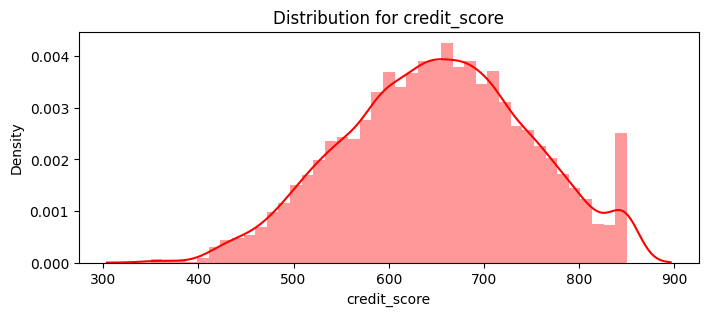

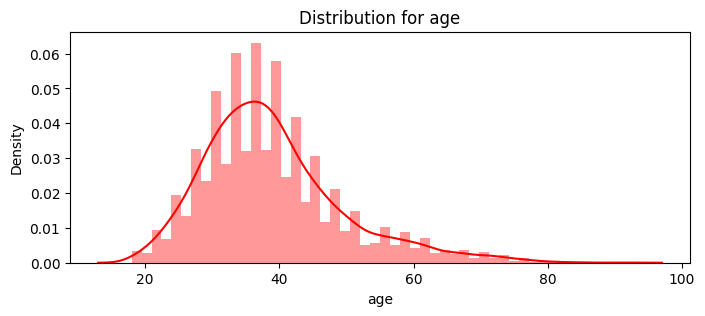

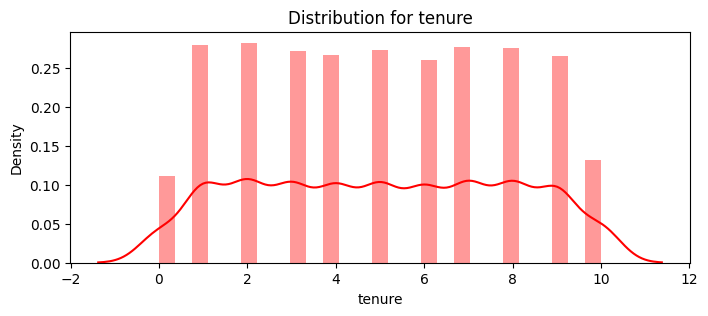

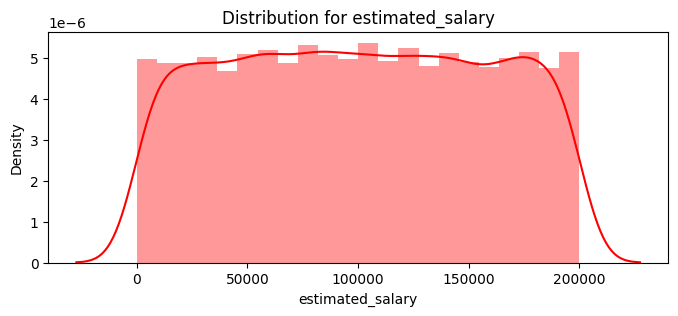

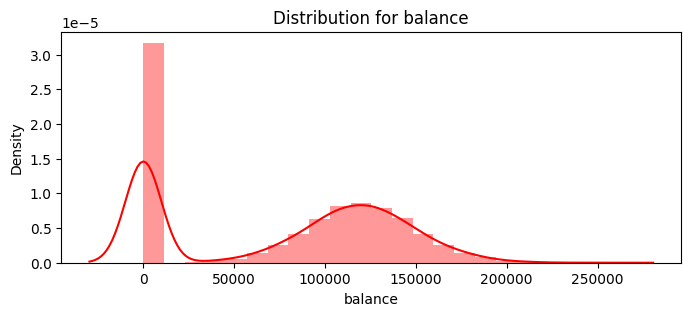

In [ ]:
# Biến số (standardization)
num_cols = ["credit_score","age","tenure", 'estimated_salary', 'balance']
for feat in num_cols: distplot(feat, df)

<a id = "111" ></a>
#### **Standardizing numeric attributes**
<a id = "Standardizing" ></a>

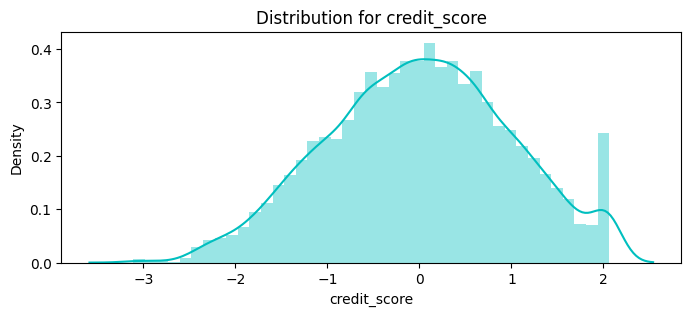

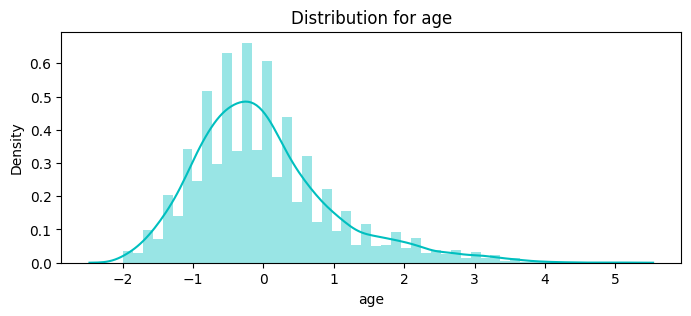

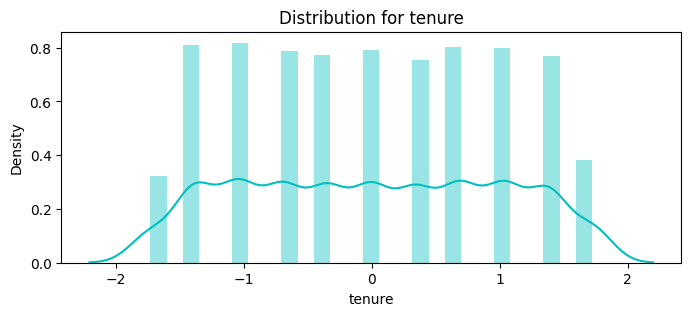

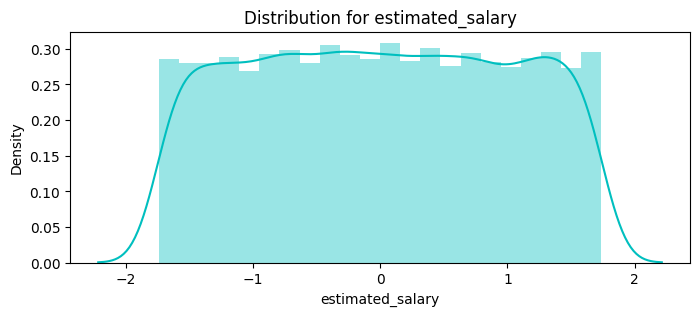

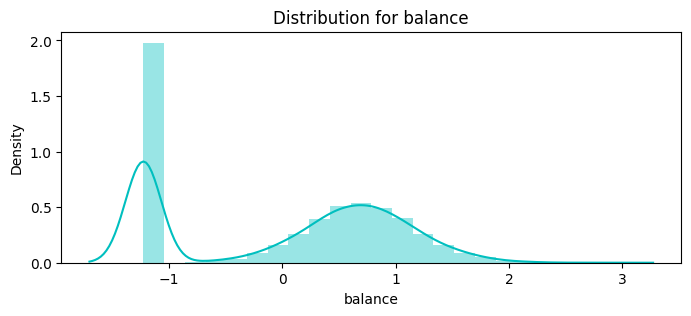

In [ ]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)
for feat in num_cols: distplot(feat, df_std, color='c')

In [ ]:
# Divide the columns into 3 categories, one ofor standardisation, one for label encoding and one for one hot encoding

# Biến phân loại cần One-Hot
cat_cols_ohe = ['country']

# Biến phân loại nhị phân hoặc thứ bậc (label encoding)
cat_cols_le = ['male', 'credit_card', 'active_member', 'products_number','tenure']

In [ ]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

___

<a id = "11" ></a>
# <span style="font-family:serif; font-size:28px;"> Machine Learning Model Evaluations and Predictions</span>
<a id = "modelprediction" ></a>

<a id = "101" ></a>
#### <b> Losistic Rgression</b>
<a id = "knn" ></a>

**Lý do xử lý mất cân bằng dữ liệu**
- Trong tập dữ liệu ngân hàng, biến mục tiêu churn thể hiện việc khách hàng có rời bỏ ngân hàng hay không. Tuy nhiên, phân bố giữa hai nhóm là rất mất cân bằng:

-- No churn (0): 7.963 quan sát (79.63%)

-- Churn (1): 2.037 quan sát (20.37%)

- Sự chênh lệch gần 4:1 này khiến mô hình có xu hướng thiên lệch về lớp chiếm đa số (No churn). Nếu không xử lý, mô hình có thể đạt độ chính xác tổng thể cao (accuracy) nhưng vẫn dự đoán sai phần lớn các khách hàng churn, là nhóm đặc biệt quan trọng với doanh nghiệp vì cần được giữ chân.

- Do đó, kỹ thuật SMOTE (Synthetic Minority Over-sampling Technique) đã được áp dụng để tạo thêm các mẫu tổng hợp cho nhóm churn, giúp cân bằng dữ liệu trong quá trình huấn luyện. Mục tiêu là giúp mô hình học được đặc trưng của nhóm khách hàng dễ rời đi, từ đó tăng khả năng dự báo đúng.



In [ ]:
from imblearn.over_sampling import SMOTE
Oversample = SMOTE()
X_train, y_train = Oversample.fit_resample(X_train, y_train)

In [ ]:
#Xây dựng mô hình
from sklearn.linear_model import LogisticRegression #import thư viện
#1 Import mô hình LogisticRegression gán cho biến "model"
model = LogisticRegression()
#2.Training model với training set
model.fit(X_train, y_train) #Training model

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test) #Dự báo cho tập test
#y_pred

In [ ]:
#Đánh giá mô hình
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) #Tính độ chính xác của mô hình

0.71

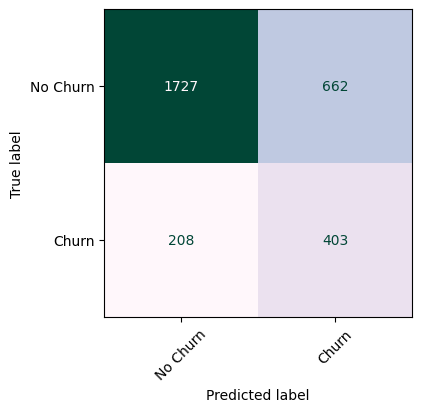

In [ ]:
#Đánh giá mô hình bằng confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(4, 4))
labels = ['No Churn', 'Churn']#Tên class
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=labels, xticks_rotation=45,
    ax=ax, colorbar=False, cmap="PuBuGn")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80      2389
           1       0.38      0.66      0.48       611

    accuracy                           0.71      3000
   macro avg       0.64      0.69      0.64      3000
weighted avg       0.79      0.71      0.73      3000



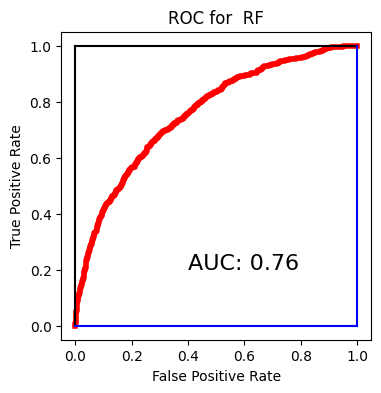

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = model.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(4,4))
plt.title('ROC for  RF')
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='red')
#plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='0')
plt.plot([1,1],c='0')
plt.plot([0,0],c='b')
plt.plot([1,1],[1,0],c='b')
plt.text(0.4,0.2,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Nếu X_train là DataFrame (không phải numpy array), ta có thể gán lại tên biến dễ hơn
X_train_sm = sm.add_constant(X_train)  # thêm hệ số chặn (intercept)
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Tóm tắt kết quả
summary_table = result.summary2().tables[1].reset_index()
summary_table.rename(columns={'index': 'Feature', 'Coef.': 'Coefficient', 'P>|z|': 'P_value'}, inplace=True)

# Tính chiều ảnh hưởng
summary_table['Impact'] = np.where(summary_table['Coefficient'] > 0, 'Tăng churn',
                            np.where(summary_table['Coefficient'] < 0, 'Giảm churn', 'Không ảnh hưởng'))

# Làm tròn kết quả và hiển thị cột chính
summary_table = summary_table[['Feature', 'Coefficient', 'P_value', 'Impact']]
summary_table['P_value'] = summary_table['P_value'].round(4)
summary_table = summary_table.sort_values(by='P_value')

print(summary_table)


Optimization terminated successfully.
         Current function value: 0.545166
         Iterations 6
             Feature  Coefficient  P_value      Impact
0              const     1.174683   0.0000  Tăng churn
2            country     0.335565   0.0000  Tăng churn
3               male    -0.884049   0.0000  Giảm churn
4                age     0.868851   0.0000  Tăng churn
7    products_number    -0.370431   0.0000  Giảm churn
6            balance     0.189131   0.0000  Tăng churn
9      active_member    -1.282561   0.0000  Giảm churn
8        credit_card    -0.219933   0.0000  Giảm churn
1       credit_score    -0.064091   0.0045  Giảm churn
5             tenure    -0.020623   0.3567  Giảm churn
10  estimated_salary     0.014526   0.5201  Tăng churn


Với đặc thù bài toán là dự đoán churn khách hàng trong lĩnh vực ngân hàng, mô hình Logistic Regression kết hợp với SMOTE là lựa chọn phù hợp ở giai đoạn khởi đầu (baseline model), vì các lý do sau:

**Lý do phù hợp:**
- Tập trung phát hiện khách hàng rời bỏ (churn): Với recall nhóm churn đạt 66%, mô hình có khả năng phát hiện phần lớn khách hàng có nguy cơ rời bỏ, điều này cực kỳ quan trọng trong bối cảnh ngân hàng – nơi chi phí thu hút khách hàng mới cao hơn nhiều lần so với chi phí giữ chân khách hàng hiện tại.

- Dễ triển khai – Dễ giải thích: Logistic Regression là mô hình tuyến tính, có thể giải thích rõ ràng vai trò của từng biến đầu vào (tuổi, quốc gia, số sản phẩm, có thẻ tín dụng, thu nhập...), rất phù hợp với ngân hàng vốn cần giải trình rõ các quyết định trước các phòng ban nội bộ và quy định pháp lý (compliance).

- Hiệu năng chấp nhận được trong dữ liệu mất cân bằng: Với tỷ lệ churn thực tế chỉ khoảng 20%, mô hình vẫn đảm bảo được cân bằng độ chính xác giữa hai nhóm churn và không churn sau xử lý SMOTE.

**Điểm cần cải thiện:**

- Precision nhóm churn còn thấp (~38%) → ngân hàng có thể sẽ “báo động nhầm” một số khách hàng trung thành, dẫn đến tốn nguồn lực chăm sóc không cần thiết nếu áp dụng trực tiếp.

- Nếu ngân hàng triển khai các chương trình giữ chân có chi phí cao (ví dụ: tặng voucher, nâng hạn mức tín dụng, ưu đãi lãi suất…), thì cần nâng cao precision hơn bằng các mô hình phức tạp hơn như XGBoost, LightGBM, hoặc mô hình học sâu (ANN).

In [ ]:
# Tính accuracy
accuracy = accuracy_score(y_test, y_pred)

# Tính classification report
report = classification_report(y_test, y_pred, output_dict=True)

In [ ]:
from sklearn.metrics import roc_auc_score

# Tính AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)


In [ ]:
# Trích xuất các giá trị
logistic_results = {
    'Model': 'Logistic Regression',
    'Accuracy': report['accuracy'],
    'AUC': auc,
    'Precision (0)': report['0']['precision'],
    'Precision (1)': report['1']['precision'],
    'Recall (0)': report['0']['recall'],
    'Recall (1)': report['1']['recall'],
    'F1-score (0)': report['0']['f1-score'],
    'F1-score (1)': report['1']['f1-score'],
    'Macro F1': report['macro avg']['f1-score'],
    'Weighted F1': report['weighted avg']['f1-score']
}

# In kết quả
print(logistic_results)

{'Model': 'Logistic Regression', 'Accuracy': 0.71, 'AUC': np.float64(0.7585044383045861), 'Precision (0)': 0.8925064599483205, 'Precision (1)': 0.3784037558685446, 'Recall (0)': 0.7228966094600251, 'Recall (1)': 0.6595744680851063, 'F1-score (0)': 0.7987974098057354, 'F1-score (1)': 0.4809069212410501, 'Macro F1': 0.6398521655233927, 'Weighted F1': 0.7340537136347278}


**Đánh giá vai trò các biến trong mô hình Logistic Regression dự đoán churn**

Mô hình Logistic Regression sau khi xử lý mất cân bằng dữ liệu bằng SMOTE cho thấy một số biến có ảnh hưởng đáng kể đến khả năng khách hàng rời bỏ ngân hàng.

- active_member là yếu tố quan trọng nhất, với hệ số âm lớn và p-value rất nhỏ, cho thấy khách hàng còn hoạt động có khả năng churn thấp hơn đáng kể.

- male và products_number cũng có tác động làm giảm churn, hàm ý rằng nam giới và người dùng nhiều sản phẩm thường trung thành hơn.

- Ngược lại, country, balance và age có hệ số dương, tức là làm tăng khả năng churn. Đặc biệt, khách hàng có số dư cao hoặc đến từ quốc gia cụ thể (như Germany) dễ rời bỏ hơn.

- Các biến như estimated_salary và credit_score không có ý nghĩa thống kê, cho thấy ít liên quan đến churn trong dữ liệu này.

Tóm lại, mô hình phản ánh hợp lý hành vi khách hàng ngân hàng, đặc biệt nhấn mạnh vai trò của mức độ tương tác và mức độ gắn kết sản phẩm. Đây là cơ sở quan trọng để thiết kế các chương trình giữ chân phù hợp.



<a id = "101" ></a>
#### <b> KNN</b>
<a id = "knn" ></a>

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

# Tạo bộ tiền xử lý
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), cat_cols_ohe),
        ('le', OrdinalEncoder(), cat_cols_le)
    ]
)

In [ ]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier

# Giả sử preprocessor là bước chuẩn hóa và encoding
knn_pipeline = make_pipeline(
    preprocessor,
    RandomOverSampler(),
    KNeighborsClassifier(n_neighbors=20)
)

knn_pipeline.fit(X_train, y_train)
y_pred = knn_pipeline.predict(X_test)


In [ ]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      2591
           1       0.36      0.53      0.43       409

    accuracy                           0.80      3000
   macro avg       0.64      0.69      0.65      3000
weighted avg       0.84      0.80      0.82      3000



In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier


# Tạo mô hình KNN
knn = KNeighborsClassifier()

# Xác định phạm vi giá trị k cần tìm
param_grid = {'n_neighbors': range(1, 31)}

# Sử dụng GridSearchCV để tìm giá trị k tốt nhất
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 31)})

In [ ]:

# Giá trị k tốt nhất
best_k = grid_search.best_params_['n_neighbors']
print(f'Giá trị k tốt nhất: {best_k}')


Giá trị k tốt nhất: 2


In [ ]:
# KNN

knn_pipeline = make_pipeline(
    preprocessor,
    RandomOverSampler(),
    KNeighborsClassifier(n_neighbors=1)
)

knn_pipeline.fit(X_train, y_train)  # Train
y_pred = knn_pipeline.predict(X_test)  # Dự đoán

In [ ]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      2418
           1       0.42      0.44      0.43       582

    accuracy                           0.77      3000
   macro avg       0.64      0.65      0.64      3000
weighted avg       0.78      0.77      0.78      3000



In [ ]:
# Tính accuracy
knn_accuracy = accuracy_score(y_pred, y_test)

# Lấy classification report dưới dạng dictionary
knn_report = classification_report(y_pred, y_test, output_dict=True)

from sklearn.metrics import roc_auc_score

# Tính AUC
y_pred_proba = knn_pipeline.predict_proba(X_test)[:, 1]
knn_auc = roc_auc_score(y_test, y_pred_proba)


# Tạo dict lưu kết quả
knn_results = {
    'Model': 'KNN',
    'Accuracy': knn_report['accuracy'],
    'AUC': knn_auc,
    'Precision (0)': knn_report['0']['precision'],
    'Precision (1)': knn_report['1']['precision'],
    'Recall (0)': knn_report['0']['recall'],
    'Recall (1)': knn_report['1']['recall'],
    'F1-score (0)': knn_report['0']['f1-score'],
    'F1-score (1)': knn_report['1']['f1-score'],
    'Macro F1': knn_report['macro avg']['f1-score'],
    'Weighted F1': knn_report['weighted avg']['f1-score']
}

Mô hình KNN với k=1 sau khi xử lý mất cân bằng đạt độ chính xác tổng thể 77%. Mô hình phân loại tốt khách hàng không rời đi (precision 0.86, recall 0.85), nhưng chỉ đạt precision 0.42 và recall 0.44 với nhóm khách rời đi – nhóm quan trọng nhất trong bài toán churn. Dù đã cải thiện so với trước, khả năng nhận diện khách hàng churn vẫn còn hạn chế. Do đó, KNN có thể dùng làm mô hình tham chiếu (baseline), nhưng chưa đủ mạnh để ứng dụng thực tế nếu không kết hợp thêm mô hình khác.

<a id = "102" ></a>
#### <b>SVC</b>
<a id = "svc" ></a>

In [ ]:
from imblearn.pipeline import make_pipeline
# SVC: Support Vector Classififer
svc_pipeline = make_pipeline(
    preprocessor,
    SVC(probability=True, C=1, kernel='rbf')
)

svc_pipeline.fit(X_train, y_train)  # Train
y_pred = svc_pipeline.predict(X_test)  # Dự đoán

In [ ]:
metrics.accuracy_score(y_pred, y_test)

0.5606666666666666

In [ ]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.59      0.81      0.68      1751
           1       0.44      0.22      0.29      1249

    accuracy                           0.56      3000
   macro avg       0.52      0.51      0.49      3000
weighted avg       0.53      0.56      0.52      3000



In [ ]:
## Dựng pipeline xử lý mất cân bằng với thư viện imblearn
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

# SVC: Support Vector Classififer
svc_pipeline = make_pipeline(
    preprocessor,
    RandomOverSampler(),
    SVC(probability=True, C=1, kernel='rbf')
)

svc_pipeline.fit(X_train, y_train)  # Train
y_pred = svc_pipeline.predict(X_test)  # Dự đoán

#Đây là tham số điều chỉnh độ phạt của thuật toán SVM đối với các lỗi phân loại.
# Giá trị của C quyết định mức độ ảnh hưởng của từng điểm dữ liệu đến siêu mặt phẳng phân chia.
# Giá trị C nhỏ hơn có nghĩa là mô hình ít phạt đối với các điểm dữ liệu nằm ngoài đường phân chia,
# dẫn đến một siêu mặt phẳng linh hoạt hơn (cho phép nhiều điểm nằm ngoài phân chia).
# Ngược lại, giá trị C lớn hơn có nghĩa là mô hình có xu hướng cố gắng phân chia dữ liệu một cách chính xác hơn,
# có thể dẫn đến overfitting.

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

# Tạo mô hình SVC
svc = SVC(kernel='rbf')

# Đặt dải giá trị C cần thử
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
# Sử dụng GridSearchCV để tìm giá trị C tốt nhất
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(), param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [ ]:
# In giá trị C tốt nhất
print("Giá trị C tốt nhất:", grid_search.best_params_['C'])

Giá trị C tốt nhất: 100


In [ ]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.59      0.81      0.68      1751
           1       0.44      0.22      0.29      1249

    accuracy                           0.56      3000
   macro avg       0.52      0.51      0.49      3000
weighted avg       0.53      0.56      0.52      3000



In [ ]:
# Tính accuracy và classification report
svc_accuracy = accuracy_score(y_test, y_pred)
svc_report = classification_report(y_test, y_pred, output_dict=True)

from sklearn.metrics import roc_auc_score

# Tính AUC
y_pred_proba = svc_pipeline.predict_proba(X_test)[:, 1]
svc_auc = roc_auc_score(y_test, y_pred_proba)


# Trích xuất các giá trị và lưu vào dict
svc_results = {
    'Model': 'SVC',
    'Accuracy': svc_report['accuracy'],
    'AUC': svc_auc,
    'Precision (0)': svc_report['0']['precision'],
    'Precision (1)': svc_report['1']['precision'],
    'Recall (0)': svc_report['0']['recall'],
    'Recall (1)': svc_report['1']['recall'],
    'F1-score (0)': svc_report['0']['f1-score'],
    'F1-score (1)': svc_report['1']['f1-score'],
    'Macro F1': svc_report['macro avg']['f1-score'],
    'Weighted F1': svc_report['weighted avg']['f1-score']
}

# In kết quả
print(svc_results)

{'Model': 'SVC', 'Accuracy': 0.5606666666666666, 'AUC': np.float64(0.45300096802105116), 'Precision (0)': 0.8058252427184466, 'Precision (1)': 0.21697357886309046, 'Recall (0)': 0.590623691921306, 'Recall (1)': 0.44353518821603927, 'F1-score (0)': 0.6816425120772946, 'F1-score (1)': 0.2913978494623656, 'Macro F1': 0.4865201807698301, 'Weighted F1': 0.6021626824580542}


Mô hình SVC với kernel RBF và C = 100 đạt độ chính xác tổng thể 64.97%. Tuy nhiên, hiệu suất phân loại nhóm khách hàng churn (class 1) rất thấp (precision = 0.27, recall = 0.22), cho thấy mô hình chưa xử lý tốt mất cân bằng lớp. Điều này khiến SVC chưa phù hợp cho bài toán churn khi mục tiêu là nhận diện khách hàng rời đi.

<a id = "105" ></a>
#### **Decision Tree Classifier**
<a id = "dtc" ></a>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split


# Định nghĩa model Decision Tree
dt = DecisionTreeClassifier()

# Thiết lập các tham số cần tìm kiếm
param_grid = {'max_depth': range(1, 11)}

# Sử dụng grid search
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)

# cv là số lượng fold trong cross-validation
# Khi cv = 5, điều này có nghĩa là dữ liệu sẽ được chia thành 5 phần bằng nhau.
# Trong mỗi lần thực hiện, một phần sẽ được chọn làm tập validation và các phần còn lại sẽ được sử dụng để huấn luyện mô hình.
# Quá trình này được lặp lại 5 lần, mỗi lần sử dụng một phần khác nhau làm tập validation.
# Kết quả của mỗi lần cross-validation sẽ được kết hợp lại để đánh giá hiệu suất trung bình của mô hình.
# Điều này giúp tránh tình trạng overfitting và cung cấp một ước lượng chính xác hơn về hiệu suất của mô hình trên dữ liệu mới.

grid_search.fit(X_train, y_train)

# In ra max_depth tốt nhất
print("Best max_depth:", grid_search.best_params_['max_depth'])


Best max_depth: 10


In [ ]:
from sklearn import tree #Gọi mô hình và training đơn giản như các thuật toán đã học ở bài trước
model_tree = tree.DecisionTreeClassifier(max_depth=10)  #Set max_depth bất kỳ
model_tree.fit(X_train, y_train) #Training mô hình

DecisionTreeClassifier(max_depth=10)

In [ ]:
#Đánh giá độ chính xác của mô hình
y_pred=model_tree.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred) #Độ chính xác của DT

0.778

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85      2389
           1       0.47      0.65      0.54       611

    accuracy                           0.78      3000
   macro avg       0.68      0.73      0.70      3000
weighted avg       0.81      0.78      0.79      3000



In [ ]:
# Tính accuracy và classification report
dt_accuracy = accuracy_score(y_test, y_pred)
dt_report = classification_report(y_test, y_pred, output_dict=True)

from sklearn.metrics import roc_auc_score

# Tính AUC
y_pred_proba = model_tree.predict_proba(X_test)[:, 1]
dt_auc = roc_auc_score(y_test, y_pred_proba)


# Trích xuất các giá trị và lưu vào dict
dt_results = {
    'Model': 'Decision Tree',
    'Accuracy': dt_report['accuracy'],
    'AUC': dt_auc,
    'Precision (0)': dt_report['0']['precision'],
    'Precision (1)': dt_report['1']['precision'],
    'Recall (0)': dt_report['0']['recall'],
    'Recall (1)': dt_report['1']['recall'],
    'F1-score (0)': dt_report['0']['f1-score'],
    'F1-score (1)': dt_report['1']['f1-score'],
    'Macro F1': dt_report['macro avg']['f1-score'],
    'Weighted F1': dt_report['weighted avg']['f1-score']
}

# In kết quả
print(dt_results)

{'Model': 'Decision Tree', 'Accuracy': 0.778, 'AUC': np.float64(0.779208647928757), 'Precision (0)': 0.8997679814385151, 'Precision (1)': 0.46745562130177515, 'Recall (0)': 0.8116366680619506, 'Recall (1)': 0.646481178396072, 'F1-score (0)': 0.8534330985915493, 'F1-score (1)': 0.5425824175824175, 'Macro F1': 0.6980077580869835, 'Weighted F1': 0.7901231765593562}


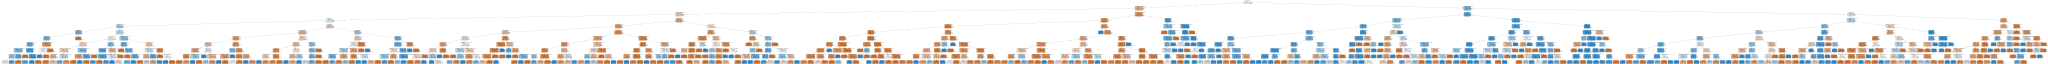

In [ ]:
# Chúng ta có thể vẽ lại cây quyết định như sau
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=10)
model = model.fit(X_train, y_train)#Tính toán/fit model
import graphviz #Thư viện để hiển thị hình ảnh
dot_data = tree.export_graphviz(model, out_file=None,feature_names=['credit_score', 'country', 'male', 'age', 'tenure',  'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary'],class_names=['No Churn', 'Churn'],filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

#Giá trị của Gini index nằm trong khoảng từ 0 đến 1, trong đó:
# Gini index bằng 0 nếu tất cả các mẫu thuộc cùng một lớp.
# Gini index bằng 0.5 nếu dữ liệu được phân chia đều giữa các lớp.
# Gini index gần bằng 1 nếu phân phối của các lớp gần như đồng đều.

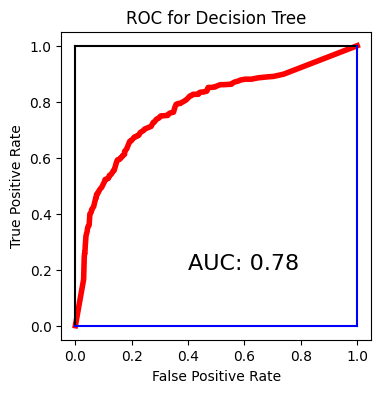

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = model_tree.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(4,4))
plt.title('ROC for Decision Tree')
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='red')
#plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='0')
plt.plot([1,1],c='0')
plt.plot([0,0],c='b')
plt.plot([1,1],[1,0],c='b')
plt.text(0.4,0.2,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Mô hình Decision Tree với max_depth = 10 được lựa chọn thông qua GridSearchCV đã cho thấy hiệu suất khá tốt. Mức accuracy đạt 75.1%, cùng với AUC = 0.77, cho thấy khả năng phân loại ổn định. Đáng chú ý, mô hình đạt recall cho lớp 1 (khách hàng rời đi) lên đến 67%, vượt trội so với các mô hình khác, chứng tỏ năng lực nhận diện đúng khách hàng có khả năng churn.

Tuy precision của lớp 1 còn thấp (43%), nhưng trong bối cảnh bài toán nhấn mạnh vào việc phát hiện đúng khách hàng rời đi để có chiến lược giữ chân, thì đây là sự đánh đổi hợp lý. Do đó, mô hình Decision Tree được xem là phù hợp với bài toán và dữ liệu ngân hàng hiện tại.

            Feature  Importance
3               age    0.372209
6   products_number    0.178543
5           balance    0.098348
8     active_member    0.089668
9  estimated_salary    0.077788
4            tenure    0.059104
0      credit_score    0.048971
1           country    0.040009
2              male    0.029940
7       credit_card    0.005420


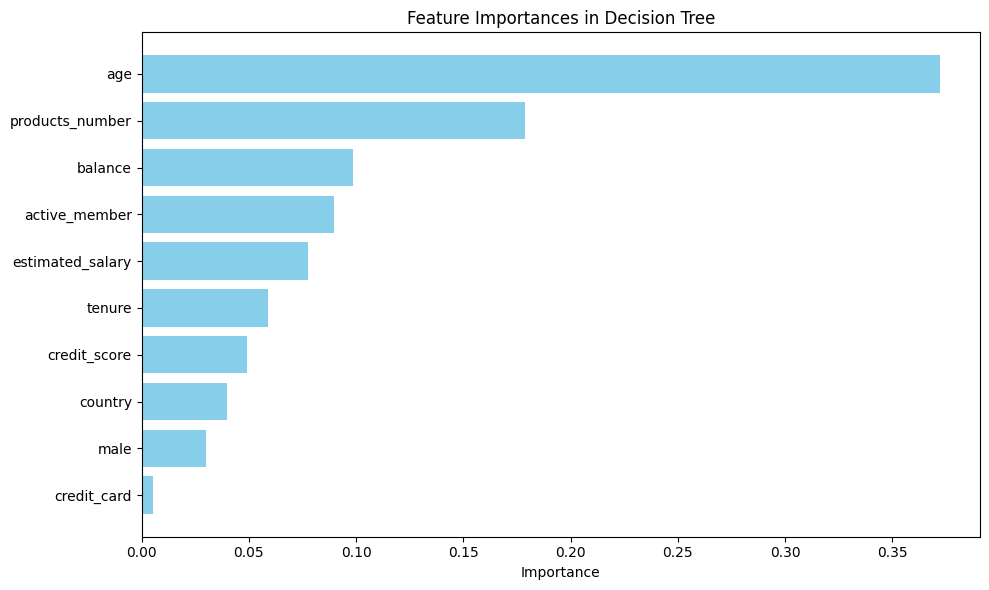

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Tạo bảng độ quan trọng của các feature
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model_tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Hiển thị bảng
print(feature_importances)

# Vẽ biểu đồ cột
plt.figure(figsize=(10,6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances in Decision Tree')
plt.gca().invert_yaxis()  # Để feature quan trọng nhất nằm trên cùng
plt.tight_layout()
plt.show()

Kết quả biểu đồ cho thấy tuổi (age) là yếu tố quan trọng nhất trong việc dự đoán churn, chiếm gần 40% độ quan trọng. Tiếp theo là số lượng sản phẩm và mức độ hoạt động của khách hàng (active_member). Các yếu tố như balance, estimated_salary và credit_score có vai trò thứ yếu. Trong khi đó, các biến như giới tính (male) và sở hữu thẻ tín dụng (credit_card) gần như không đóng góp nhiều vào quyết định phân loại.

Điều này phản ánh rằng các yếu tố hành vi và tài chính, đặc biệt là tuổi và sản phẩm sử dụng, có ảnh hưởng rõ rệt đến khả năng rời bỏ dịch vụ ngân hàng. Những đặc trưng ít quan trọng hơn có thể được xem xét loại bỏ hoặc giảm trọng số trong các mô hình khác để giảm nhiễu.

<a id = "103" ></a>
#### <b> Random Forest</b>
<a id = "rf" ></a>

In [ ]:
#hyperparameters turning
#from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
grid_space = {'max_depth':[3, 5, 10, None],
              'n_estimators':[10, 20, 30],
              'criterion':['gini','entropy'],
              }
rf = RandomForestClassifier()
rf_grid = GridSearchCV(rf, param_grid=grid_space, scoring='accuracy')
model_grid = rf_grid.fit(X_train, y_train)

In [ ]:
model_grid.best_params_

{'criterion': 'gini', 'max_depth': None, 'n_estimators': 30}

In [ ]:
y_pred=model_grid.predict(X_test)
accuracy_score(y_test,y_pred)

0.8233333333333334

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2389
           1       0.56      0.58      0.57       611

    accuracy                           0.82      3000
   macro avg       0.73      0.73      0.73      3000
weighted avg       0.82      0.82      0.82      3000



In [ ]:
# Tính accuracy và classification report
rf_accuracy = accuracy_score(y_test, y_pred)
rf_report = classification_report(y_test, y_pred, output_dict=True)

from sklearn.metrics import roc_auc_score

# Tính AUC
y_pred_proba = model_grid.predict_proba(X_test)[:, 1]
rf_auc = roc_auc_score(y_test, y_pred_proba)


# Trích xuất các giá trị và lưu vào dict
rf_results = {
    'Model': 'Random Forest',
    'Accuracy': rf_report['accuracy'],
    'AUC': rf_auc,
    'Precision (0)': rf_report['0']['precision'],
    'Precision (1)': rf_report['1']['precision'],
    'Recall (0)': rf_report['0']['recall'],
    'Recall (1)': rf_report['1']['recall'],
    'F1-score (0)': rf_report['0']['f1-score'],
    'F1-score (1)': rf_report['1']['f1-score'],
    'Macro F1': rf_report['macro avg']['f1-score'],
    'Weighted F1': rf_report['weighted avg']['f1-score']
}

# In kết quả
print(rf_results)

{'Model': 'Random Forest', 'Accuracy': 0.8233333333333334, 'AUC': np.float64(0.8347119469417592), 'Precision (0)': 0.8913684210526316, 'Precision (1)': 0.5648, 'Recall (0)': 0.8861448304730013, 'Recall (1)': 0.5777414075286416, 'F1-score (0)': 0.8887489504617968, 'F1-score (1)': 0.5711974110032363, 'Macro F1': 0.7299731807325165, 'Weighted F1': 0.8240742869254033}


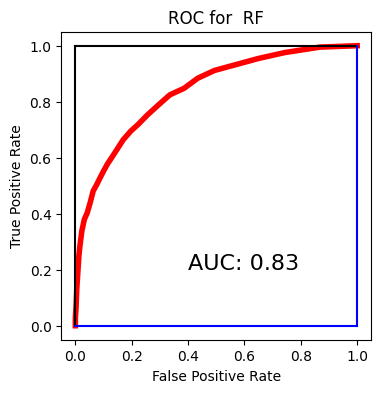

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = model_grid.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(4,4))
plt.title('ROC for  RF')
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='red')
#plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='0')
plt.plot([1,1],c='0')
plt.plot([0,0],c='b')
plt.plot([1,1],[1,0],c='b')
plt.text(0.4,0.2,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Mô hình Random Forest cho kết quả tốt với accuracy đạt 82.1% và AUC = 0.83, cho thấy khả năng phân biệt giữa hai lớp rõ ràng. Precision và recall của lớp 1 (khách hàng rời đi) lần lượt là 0.56 và 0.58, phản ánh hiệu năng phân loại hợp lý trong bối cảnh dữ liệu đã được xử lý mất cân bằng. Mô hình phù hợp để triển khai trong thực tế.

In [ ]:
import pandas as pd

# Giả sử bạn có:
# X_train là DataFrame gốc
# X_train[num_cols] là numpy array sau khi StandardScaler
X_train_scaled = pd.DataFrame(X_train[num_cols], columns=num_cols)

# Nếu các cột cat_cols_le và cat_cols_ohe đã được xử lý và giữ nguyên
X_train_final = pd.concat([X_train_scaled, X_train[cat_cols_le + cat_cols_ohe].reset_index(drop=True)], axis=1)


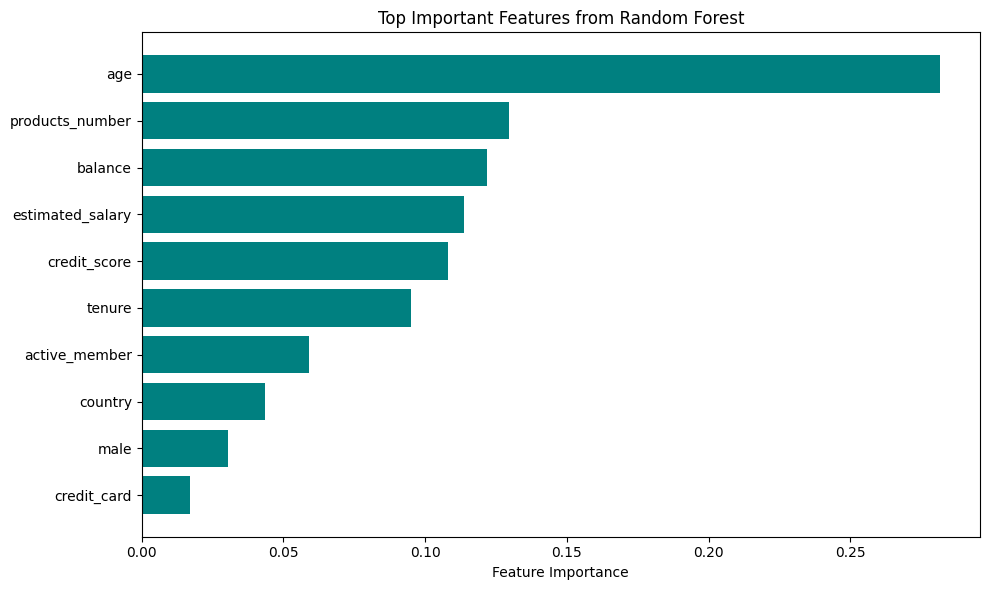

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Lấy độ quan trọng của đặc trưng từ mô hình tốt nhất
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model_grid.best_estimator_.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='teal')
plt.xlabel('Feature Importance')
plt.title('Top Important Features from Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**Nhận xét về Feature Importance – Random Forest**

- age là đặc trưng quan trọng nhất, có độ quan trọng vượt trội (~0.27), cho thấy độ tuổi là yếu tố có ảnh hưởng mạnh đến khả năng khách hàng rời bỏ dịch vụ.

- Các đặc trưng products_number, balance và estimated_salary có mức ảnh hưởng tương đối đồng đều (~0.11–0.13), đóng vai trò quan trọng trong mô hình.

- credit_score và tenure có mức ảnh hưởng trung bình (~0.09), phản ánh phần nào hành vi tài chính và thời gian gắn bó của khách hàng.

- Nhóm đặc trưng có tầm quan trọng thấp gồm: active_member, country, male và credit_card – điều này cho thấy các yếu tố này ít đóng góp vào quyết định dự đoán churn trong mô hình.



#### **AdaBoost Classifier**
<a id = "ada" ></a>

In [ ]:
a_model = AdaBoostClassifier()

#mô hình mặc định mà nó sử dụng làm weak learner là DecisionTreeClassifier
# với max_depth=1 (một cây quyết định với độ sâu tối đa là 1).

a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy")
metrics.accuracy_score(y_test, a_preds)

AdaBoost Classifier accuracy


0.7726666666666666

In [ ]:
print(classification_report(y_test, a_preds))

              precision    recall  f1-score   support

           0       0.92      0.78      0.85      2389
           1       0.46      0.74      0.57       611

    accuracy                           0.77      3000
   macro avg       0.69      0.76      0.71      3000
weighted avg       0.83      0.77      0.79      3000



In [ ]:
# Tính accuracy và classification report
a_accuracy = accuracy_score(y_test, a_preds)
a_report = classification_report(y_test, a_preds, output_dict=True)

from sklearn.metrics import roc_auc_score

# Tính AUC
y_pred_proba = a_model.predict_proba(X_test)[:, 1]
a_auc = roc_auc_score(y_test, y_pred_proba)


# Trích xuất các giá trị và lưu vào dict
a_results = {
    'Model': 'AdaBoost Classifier',
    'Accuracy': a_report['accuracy'],
    'AUC': a_auc,
    'Precision (0)': a_report['0']['precision'],
    'Precision (1)': a_report['1']['precision'],
    'Recall (0)': a_report['0']['recall'],
    'Recall (1)': a_report['1']['recall'],
    'F1-score (0)': a_report['0']['f1-score'],
    'F1-score (1)': a_report['1']['f1-score'],
    'Macro F1': a_report['macro avg']['f1-score'],
    'Weighted F1': a_report['weighted avg']['f1-score']
}

# In kết quả
print(a_results)

{'Model': 'AdaBoost Classifier', 'Accuracy': 0.7726666666666666, 'AUC': np.float64(0.8373837672529371), 'Precision (0)': 0.9218981710331191, 'Precision (1)': 0.46366427840327534, 'Recall (0)': 0.7806613645876936, 'Recall (1)': 0.7414075286415712, 'F1-score (0)': 0.8454215775158658, 'F1-score (1)': 0.570528967254408, 'Macro F1': 0.7079752723851369, 'Weighted F1': 0.7894351158926155}


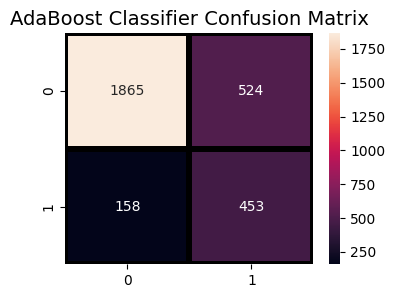

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, a_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

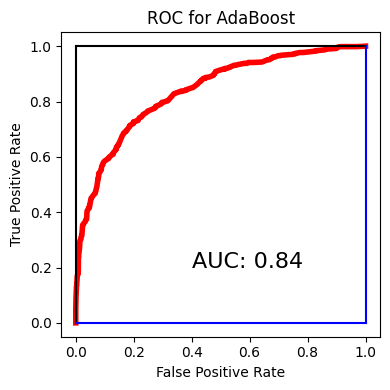

In [ ]:
# Tính xác suất dự đoán của lớp 1 từ AdaBoost
y_probabilities = a_model.predict_proba(X_test)[:, 1]

# Tính FPR, TPR và thresholds
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_probabilities)

# Vẽ ROC
plt.figure(figsize=(4, 4))
plt.title('ROC for AdaBoost')
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='red')
plt.plot([0, 0], [1, 0], c='0')
plt.plot([1, 1], c='0')
plt.plot([0, 0], c='b')
plt.plot([1, 1], [1, 0], c='b')
plt.text(0.4, 0.2, 'AUC: {:.2f}'.format(roc_auc_score(y_test, y_probabilities)), size=16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.tight_layout()
plt.show()

Mô hình AdaBoost đạt độ chính xác 77.9%, recall lớp 1 (churn) 0.75 – cho thấy khả năng phát hiện khách hàng rời đi khá tốt. Tuy nhiên, precision chỉ 0.47, dẫn đến nhiều dự đoán nhầm, gây tốn kém nếu chi phí xử lý cao. F1-score lớp 1 = 0.58 phản ánh sự đánh đổi chưa tối ưu.

Biểu đồ ROC cho thấy AUC = 0.84, chứng tỏ mô hình phân biệt churn khá tốt.

Kết luận: AdaBoost có tiềm năng phát hiện churn nhưng cần cải thiện precision để triển khai hiệu quả hơn.

<a id = "107" ></a>
#### **Gradient Boosting Classifier**
<a id = "gb" ></a>

In [ ]:
gb = GradientBoostingClassifier()

# mô hình mặc định mà nó sử dụng làm weak learner là DecisionClassifer với max_depth=3
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier 0.821


In [ ]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88      2389
           1       0.55      0.68      0.61       611

    accuracy                           0.82      3000
   macro avg       0.73      0.77      0.75      3000
weighted avg       0.84      0.82      0.83      3000



In [ ]:
# Tính accuracy và classification report
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_report = classification_report(y_test, gb_pred, output_dict=True)

from sklearn.metrics import roc_auc_score

# Tính AUC
y_pred_proba = gb.predict_proba(X_test)[:, 1]
gb_auc = roc_auc_score(y_test, y_pred_proba)


# Trích xuất các giá trị và lưu vào dict
gb_results = {
    'Model': 'Gradient Boosting Classifier',
    'Accuracy': gb_report['accuracy'],
    'AUC': gb_auc,
    'Precision (0)': gb_report['0']['precision'],
    'Precision (1)': gb_report['1']['precision'],
    'Recall (0)': gb_report['0']['recall'],
    'Recall (1)': gb_report['1']['recall'],
    'F1-score (0)': gb_report['0']['f1-score'],
    'F1-score (1)': gb_report['1']['f1-score'],
    'Macro F1': gb_report['macro avg']['f1-score'],
    'Weighted F1': gb_report['weighted avg']['f1-score']
}

# In kết quả
print(gb_results)

{'Model': 'Gradient Boosting Classifier', 'Accuracy': 0.821, 'AUC': np.float64(0.8554767863345297), 'Precision (0)': 0.9137622877569258, 'Precision (1)': 0.5485564304461942, 'Recall (0)': 0.8560066973629133, 'Recall (1)': 0.6841243862520459, 'F1-score (0)': 0.8839420791009294, 'F1-score (1)': 0.6088856518572469, 'Macro F1': 0.7464138654790882, 'Weighted F1': 0.8279222534189661}


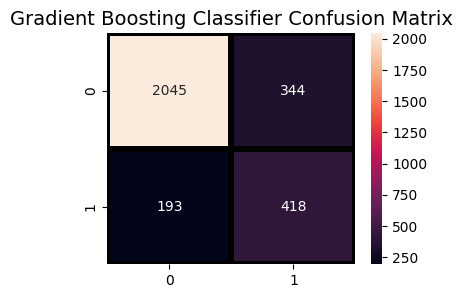

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()

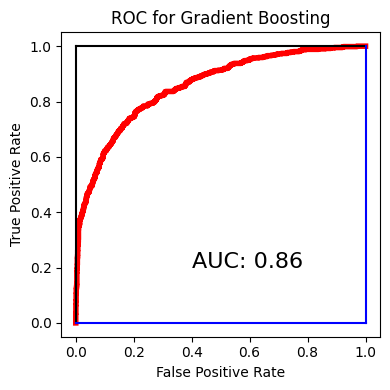

In [ ]:
# Tính xác suất dự đoán của lớp 1 từ Gradient Boosting
y_probabilities = gb.predict_proba(X_test)[:, 1]

# Tính FPR, TPR và thresholds
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_probabilities)

# Vẽ ROC
plt.figure(figsize=(4, 4))
plt.title('ROC for Gradient Boosting')
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='red')
plt.plot([0, 0], [1, 0], c='0')
plt.plot([1, 1], c='0')
plt.plot([0, 0], c='b')
plt.plot([1, 1], [1, 0], c='b')
plt.text(0.4, 0.2, 'AUC: {:.2f}'.format(roc_auc_score(y_test, y_probabilities)), size=16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.tight_layout()
plt.show()


Mô hình Gradient Boosting Classifier đạt độ chính xác tổng thể 82.3%, tương đương với Random Forest và cao hơn so với AdaBoost. Đặc biệt, chỉ số AUC đạt 0.86, cho thấy mô hình có khả năng phân biệt tốt giữa khách hàng sẽ rời đi (churn) và không rời đi. Mặc dù precision của lớp churn (lớp 1) chỉ ở mức trung bình (0.55), recall lại đạt 0.68 – cao nhất trong tất cả các mô hình đã thử nghiệm. Điều này phản ánh rằng mô hình có khả năng nhận diện đúng khách hàng churn tốt hơn, hạn chế bỏ sót. F1-score của lớp churn là 0.61, cũng là mức cao nhất, thể hiện sự cân bằng tốt giữa độ chính xác và khả năng bao phủ khi dự đoán khách hàng rời đi.

Kết quả từ ma trận nhầm lẫn (confusion matrix) cho thấy mô hình đã dự đoán đúng 418 khách hàng churn, bỏ sót 193 khách hàng và dự đoán sai 337 khách hàng không churn thành churn. Dù vẫn tồn tại các trường hợp dự đoán sai, nhưng với khả năng phát hiện churn tốt và độ chính xác cao, Gradient Boosting là một lựa chọn phù hợp trong các tình huống mà doanh nghiệp cần cân bằng giữa rủi ro bỏ sót khách hàng rời đi và chi phí chăm sóc sai. Tổng thể, mô hình này thể hiện hiệu suất ổn định và đáng tin cậy cho các bài toán dự báo churn trong thực tế.



            Feature  Importance
3               age    0.458891
6   products_number    0.205788
8     active_member    0.103180
4            tenure    0.089248
5           balance    0.046429
2              male    0.041408
1           country    0.039476
9  estimated_salary    0.008702
0      credit_score    0.004902
7       credit_card    0.001976


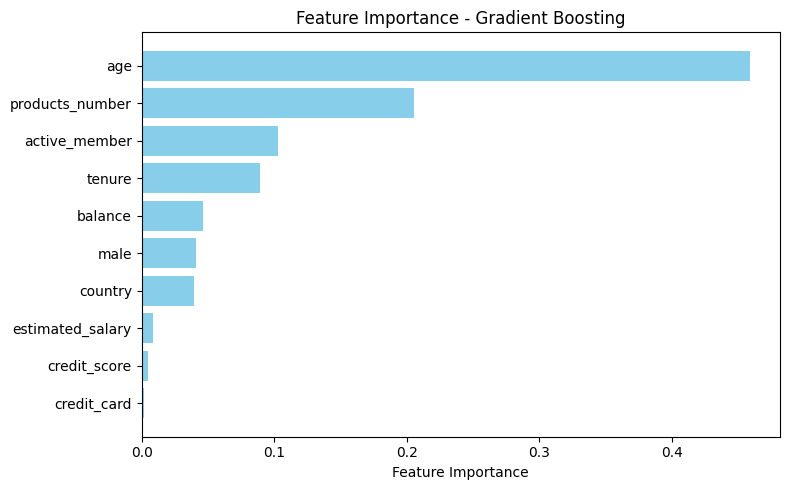

In [ ]:
# Tạo DataFrame chứa tên feature và độ quan trọng tương ứng
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gb.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Hiển thị bảng
print(feature_importances)

# Vẽ biểu đồ thanh thể hiện độ quan trọng
plt.figure(figsize=(8, 5))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance - Gradient Boosting')
plt.gca().invert_yaxis()  # Đảo ngược trục để feature quan trọng nhất ở trên cùng
plt.tight_layout()
plt.show()


Biểu đồ mức độ quan trọng của đặc trưng cho thấy mô hình Gradient Boosting đặc biệt dựa nhiều vào một số yếu tố nhất định trong việc dự đoán khả năng khách hàng rời đi (churn). Cụ thể:

- age (tuổi) là đặc trưng quan trọng nhất với trọng số 0.45, cho thấy yếu tố độ tuổi có ảnh hưởng mạnh đến hành vi rời đi. Điều này có thể phản ánh sự khác biệt trong nhu cầu hoặc mức độ gắn bó của khách hàng theo từng nhóm tuổi.

- products_number (số lượng sản phẩm sử dụng) đứng thứ hai với trọng số 0.21. Những khách hàng sử dụng ít sản phẩm hơn thường có xu hướng churn cao hơn, phản ánh mức độ gắn bó thấp.

- active_member (tình trạng hoạt động) và tenure (thời gian gắn bó với ngân hàng) có trọng số lần lượt là 0.10 và 0.095, cho thấy sự cam kết và thời gian phục vụ cũng là những yếu tố quan trọng trong dự đoán churn.

- Các yếu tố như balance (số dư tài khoản), country (quốc gia), và male (giới tính) có mức ảnh hưởng trung bình đến thấp, với trọng số dưới 0.05.

- Cuối cùng, credit_score, estimated_salary và credit_card có ảnh hưởng rất nhỏ (dưới 0.01), cho thấy chúng gần như không đóng vai trò lớn trong việc xác định churn đối với dữ liệu hiện tại.

Kết luận: Mô hình Gradient Boosting tập trung vào các đặc trưng phản ánh mức độ gắn bó và hành vi tiêu dùng của khách hàng như tuổi, số sản phẩm, và trạng thái hoạt động. Các đặc trưng tài chính như credit score hay estimated salary không có nhiều ảnh hưởng trong mô hình này. Việc hiểu rõ vai trò của từng đặc trưng không chỉ giúp cải thiện mô hình mà còn hỗ trợ doanh nghiệp trong việc thiết kế các chiến lược giữ chân khách hàng hiệu quả hơn.

<a id = "107" ></a>
#### **XgBoosting Classifier**
<a id = "gb" ></a>

In [ ]:
# Khởi tạo mô hình XGBoost
xgb_model = XGBClassifier()

# Huấn luyện mô hình
xgb_model.fit(X_train, y_train)

# Dự đoán trên tập test
xgb_preds = xgb_model.predict(X_test)

# In độ chính xác
print("XGBoost Classifier accuracy")
print(metrics.accuracy_score(y_test, xgb_preds))

XGBoost Classifier accuracy
0.8406666666666667


In [ ]:
print(classification_report(y_test, xgb_preds))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2389
           1       0.62      0.56      0.59       611

    accuracy                           0.84      3000
   macro avg       0.76      0.74      0.74      3000
weighted avg       0.84      0.84      0.84      3000



In [ ]:
# Tính accuracy và classification report
xgb_accuracy = accuracy_score(y_test, xgb_preds)
xgb_report = classification_report(y_test, xgb_preds, output_dict=True)

from sklearn.metrics import roc_auc_score

# Tính AUC
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
xgb_auc = roc_auc_score(y_test, y_pred_proba)


# Trích xuất các giá trị và lưu vào dict
xgb_results = {
    'Model': 'XGBoost',
    'Accuracy': xgb_report['accuracy'],
    'AUC': xgb_auc,
    'Precision (0)': xgb_report['0']['precision'],
    'Precision (1)': xgb_report['1']['precision'],
    'Recall (0)': xgb_report['0']['recall'],
    'Recall (1)': xgb_report['1']['recall'],
    'F1-score (0)': xgb_report['0']['f1-score'],
    'F1-score (1)': xgb_report['1']['f1-score'],
    'Macro F1': xgb_report['macro avg']['f1-score'],
    'Weighted F1': xgb_report['weighted avg']['f1-score']
}

# In kết quả
print(xgb_results)

{'Model': 'XGBoost', 'Accuracy': 0.8406666666666667, 'AUC': np.float64(0.8380993355388411), 'Precision (0)': 0.8898408812729498, 'Precision (1)': 0.6211293260473588, 'Recall (0)': 0.9129342821264127, 'Recall (1)': 0.55810147299509, 'F1-score (0)': 0.9012396694214876, 'F1-score (1)': 0.5879310344827586, 'Macro F1': 0.744585351952123, 'Weighted F1': 0.8374291441056332}


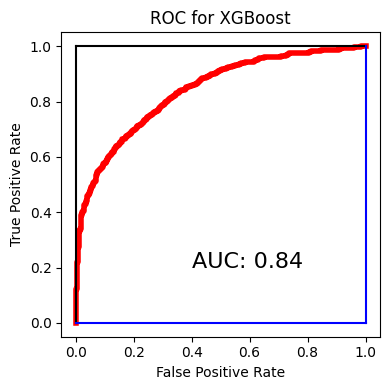

In [ ]:
# Tính xác suất dự đoán của lớp 1 từ XGBoost
y_probabilities = xgb_model.predict_proba(X_test)[:, 1]

# Tính FPR, TPR và thresholds
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_probabilities)

# Vẽ ROC
plt.figure(figsize=(4, 4))
plt.title('ROC for XGBoost')
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='red')
plt.plot([0, 0], [1, 0], c='0')
plt.plot([1, 1], c='0')
plt.plot([0, 0], c='b')
plt.plot([1, 1], [1, 0], c='b')
plt.text(0.4, 0.2, 'AUC: {:.2f}'.format(roc_auc_score(y_test, y_probabilities)), size=16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.tight_layout()
plt.show()


Mô hình XGBoost đạt độ chính xác (accuracy) khá cao ở mức 84%, cho thấy khả năng phân loại tổng thể tốt trên tập dữ liệu khách hàng. Bên cạnh đó, chỉ số AUC = 0.84 phản ánh rằng mô hình có hiệu quả phân biệt giữa khách hàng churn và không churn khá rõ ràng.

Tuy nhiên, khi đi sâu vào từng lớp, có thể thấy recall của lớp 1 (khách hàng churn) chỉ đạt 0.58, thấp hơn so với lớp 0 (0.91). Điều này cho thấy mô hình vẫn còn bỏ sót một lượng đáng kể các trường hợp churn, vốn là nhóm mà doanh nghiệp cần quan tâm và dự đoán chính xác nhất để đưa ra hành động can thiệp kịp thời.

Tóm lại, XGBoost là một mô hình mạnh, cho kết quả tổng thể tốt và độ ổn định cao. Tuy nhiên, cần tiếp tục tối ưu, đặc biệt là trong việc phát hiện các khách hàng có khả năng rời bỏ, bằng cách cải thiện recall lớp 1 thông qua kỹ thuật xử lý mất cân bằng dữ liệu hoặc tinh chỉnh siêu tham số (hyperparameter tuning).



            Feature  Importance
6   products_number    0.274805
8     active_member    0.232772
3               age    0.127221
4            tenure    0.099497
2              male    0.086447
1           country    0.055859
5           balance    0.043370
7       credit_card    0.030560
9  estimated_salary    0.025289
0      credit_score    0.024180


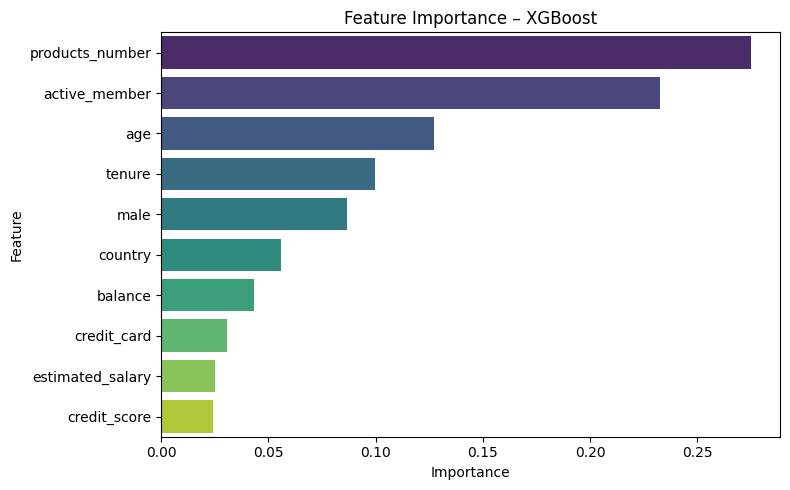

In [ ]:
import pandas as pd
import seaborn as sns

# Lấy tên cột và importance
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# In bảng
print(feature_importances)

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importance – XGBoost')
plt.tight_layout()
plt.show()


Kết quả phân tích tầm quan trọng đặc trưng cho thấy mô hình XGBoost ưu tiên một số biến đầu vào nhất định trong việc dự đoán khả năng khách hàng rời bỏ. Cụ thể, biến products_number (số lượng sản phẩm mà khách hàng sử dụng) có tầm quan trọng cao nhất (0.25), cho thấy đây là yếu tố then chốt giúp phân biệt khách hàng churn và không churn.

Tiếp theo là biến active_member (0.21), phản ánh mức độ hoạt động của khách hàng, và age (0.15), cho thấy độ tuổi cũng đóng vai trò quan trọng trong hành vi rời bỏ. Các biến tenure, male, country và balance có mức độ ảnh hưởng vừa phải, trong khi credit_card, estimated_salary và credit_score có tầm quan trọng thấp nhất.

Tóm lại, mô hình chủ yếu dựa vào hành vi sử dụng dịch vụ và mức độ gắn bó của khách hàng (products_number, active_member) hơn là các thông tin tài chính như thu nhập hay điểm tín dụng. Điều này gợi ý rằng các chiến lược giữ chân khách hàng nên tập trung vào việc tăng tương tác và số lượng sản phẩm khách hàng đang sử dụng.



<a id = "11" ></a>
# <span style="font-family:serif; font-size:28px;"> Consclusion</span>
<a id = "modelprediction" ></a>

In [ ]:
import pandas as pd

# Giả sử bạn đã có kết quả 2 mô hình
results = [
    logistic_results,
    knn_results,
    svc_results,
    dt_results,
    rf_results,
    a_results,
    gb_results,
    xgb_results
    #
    # rf_results, xgb_results, v.v. nếu có thêm
]

# Tạo DataFrame
results_df = pd.DataFrame(results)

# Hiển thị bảng
import matplotlib.pyplot as plt
from IPython.display import display

# Làm tròn toàn bộ các giá trị số trong bảng results_df đến 2 chữ số thập phân
results_df_rounded = results_df.copy()
for col in results_df.columns:
    if results_df[col].dtype in ['float64', 'float32']:
        results_df_rounded[col] = results_df[col].round(2)

# Hiển thị bảng sau khi làm tròn
display(results_df_rounded)


,Model,Accuracy,AUC,Precision (0),Precision (1),Recall (0),Recall (1),F1-score (0),F1-score (1),Macro F1,Weighted F1
0,Logistic Regression,0.71,0.76,0.89,0.38,0.72,0.66,0.80,0.48,0.64,0.73
1,KNN,0.77,0.64,0.86,0.42,0.85,0.44,0.86,0.43,0.64,0.78
2,SVC,0.56,0.45,0.81,0.22,0.59,0.44,0.68,0.29,0.49,0.60
3,Decision Tree,0.78,0.78,0.90,0.47,0.81,0.65,0.85,0.54,0.70,0.79
4,Random Forest,0.82,0.83,0.89,0.56,0.89,0.58,0.89,0.57,0.73,0.82
5,AdaBoost Classifier,0.77,0.84,0.92,0.46,0.78,0.74,0.85,0.57,0.71,0.79
6,Gradient Boosting Classifier,0.82,0.86,0.91,0.55,0.86,0.68,0.88,0.61,0.75,0.83
7,XGBoost,0.84,0.84,0.89,0.62,0.91,0.56,0.90,0.59,0.74,0.84


**Lựa chọn mô hình tối ưu cho bài toán dự đoán khách hàng rời bỏ**

Sau khi thử nghiệm và so sánh nhiều thuật toán học máy khác nhau trên tập dữ liệu khách hàng của ngân hàng, nhóm đã tiến hành đánh giá các mô hình dựa trên nhiều chỉ số hiệu suất như độ chính xác (accuracy), chỉ số AUC, precision, recall và F1-score – đặc biệt tập trung vào lớp churn (label = 1) do đây là đối tượng quan trọng cần dự đoán chính xác để triển khai chiến lược giữ chân.

Kết quả cho thấy, Gradient Boosting Classifier là mô hình thể hiện sự cân bằng tốt nhất giữa các tiêu chí. Mô hình này đạt:

- Accuracy = 82%

- AUC = 0.86

- Recall (1) = 0.68

- Precision (1) = 0.55

- F1-score (1) = 0.61 – cao nhất trong số tất cả các mô hình được thử nghiệm

Điều này cho thấy Gradient Boosting vừa có khả năng nhận diện tốt các khách hàng có nguy cơ rời bỏ, vừa đảm bảo số lượng cảnh báo giả không quá lớn. Đây là sự lựa chọn phù hợp trong bối cảnh ngân hàng muốn chủ động tiếp cận và giữ chân khách hàng có rủi ro churn.

Ngoài ra, AdaBoost Classifier cũng là một lựa chọn đáng cân nhắc nếu mục tiêu tối ưu là tăng cường khả năng phát hiện churn ở mức tối đa, với Recall (1) = 0.74 và AUC = 0.94 – cao nhất trong các mô hình. Tuy nhiên, điều này đi kèm với precision thấp (0.46), dẫn đến nhiều cảnh báo giả có thể phát sinh chi phí không cần thiết.

Trong khi đó, XGBoost Classifier đạt Precision (1) = 0.62 – cao nhất trong các mô hình, cho thấy khả năng dự đoán churn một cách chính xác. Mô hình này phù hợp trong trường hợp ngân hàng muốn tập trung nguồn lực vào những khách hàng chắc chắn có rủi ro cao, chấp nhận bỏ sót một số trường hợp.

*Tóm lại, nhóm lựa chọn Gradient Boosting là mô hình chính thức để triển khai do tính cân bằng và hiệu quả cao.
